# 1. Les packages

In [1]:
# Importer les packages nécessaires
import pandas as pd
import numpy as np
import matplotlib_inline 
import matplotlib.pyplot as plt
import seaborn as sns

# Test
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr, levene 
from statsmodels.tsa.seasonal import seasonal_decompose
#import statsmodels.api as sm

# Test de normalité
# pip install pingouin
import pingouin as pg

# Modèle d'algorithmes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, accuracy_score , precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve, f1_score
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, RandomizedSearchCV, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

import time
start_time = time.time()

# 2. Importation des données

In [2]:
# Importer les données
# ,error_bad_lines = False, low_memory = False
data_billets = pd.read_csv(r"C:\Users\diarr\Downloads\P10\billets.csv", sep =';')

## 2.1. Exploration des données

* Dans cette étape nous allons explorer nos données pour en extraire des informations ,
* Revoir la structure des données ainsi faire une courte analyse par la suite.

### 2.1.1. Dataframe "Billets"

In [3]:
# Observation des 5 premiers lignes de l'échantillon
data_billets.head(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [4]:
# Forme du jeu de donnés
data_billets.shape

(1500, 7)

Nous avons enregistré 1500 billets c'est à dire chaque ligne représente un billet en euros avec 7 caractéristiques géométriques (colonnes qui sont les dimensions pour chaque billet) que sont:
* L'authentification du billet c'est à dire la nature du billet
* length : la longueur du billet (en mm) ;
* height_left : la hauteur du billet (mesurée sur le côté gauche, en mm) ;
* height_right : la hauteur du billet (mesurée sur le côté droit, en mm) ;
* margin_up : la marge entre le bord supérieur du billet et l'image de celui-ci (en mm) ;
* margin_low : la marge entre le bord inférieur du billet et l'image de celui-ci (en mm) ;
* diagonal : la diagonale du billet (en mm).

In [5]:
# Pourcentages des valeurs nulls
pourcentage_valeur_null = round((data_billets.isnull().sum()/data_billets.shape[0]*100),2).sort_values(ascending=False)
pourcentage_valeur_null

margin_low      2.47
is_genuine      0.00
diagonal        0.00
height_left     0.00
height_right    0.00
margin_up       0.00
length          0.00
dtype: float64

In [6]:
# somme des valeurs nulls
valeur_null = data_billets.isnull().sum().sort_values(ascending=False)
valeur_null

margin_low      37
is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_up        0
length           0
dtype: int64

* On observe l'absence de valeurs manquantes uniquement dans la colonne "margin_low" avec de très faible quantité (37 sur 1500 billets) avec un pourcentage de 2.47%.

In [7]:
# Vérification des doublons
data_billets[data_billets.duplicated(["is_genuine"])].shape

(1498, 7)

In [8]:
# Vérification des doublons
data_billets[data_billets.duplicated()].shape

(0, 7)

* Nous n'avons pas observé de doublons

In [9]:
# Typages de données
info_billets = data_billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


* Les données sont au bon format.

In [10]:
# Statistiques descriptives avec toutes les variables
statistique = data_billets.describe().T
statistique

,count,mean,std,min,25%,50%,75%,max
diagonal,1500.0,171.958440,0.305195,171.04,171.750,171.96,172.17,173.01
height_left,1500.0,104.029533,0.299462,103.14,103.820,104.04,104.23,104.88
height_right,1500.0,103.920307,0.325627,102.82,103.710,103.92,104.15,104.95
margin_low,1463.0,4.485967,0.663813,2.98,4.015,4.31,4.87,6.90
margin_up,1500.0,3.151473,0.231813,2.27,2.990,3.14,3.31,3.91
length,1500.0,112.678500,0.872730,109.49,112.030,112.96,113.34,114.44


In [11]:
# Statistiques descriptives avec toutes les variables
statistique = data_billets.describe(include = "all").T
statistique

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
is_genuine,1500,2,True,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diagonal,1500.0,NaN,NaN,NaN,171.95844,0.305195,171.04,171.75,171.96,172.17,173.01
height_left,1500.0,NaN,NaN,NaN,104.029533,0.299462,103.14,103.82,104.04,104.23,104.88
height_right,1500.0,NaN,NaN,NaN,103.920307,0.325627,102.82,103.71,103.92,104.15,104.95
margin_low,1463.0,NaN,NaN,NaN,4.485967,0.663813,2.98,4.015,4.31,4.87,6.9
margin_up,1500.0,NaN,NaN,NaN,3.151473,0.231813,2.27,2.99,3.14,3.31,3.91
length,1500.0,NaN,NaN,NaN,112.6785,0.87273,109.49,112.03,112.96,113.34,114.44


In [12]:
# Statistiques descriptives par la nature des billets (vrais ou faux billets)
statistique_nature = data_billets.groupby("is_genuine").describe().T
statistique_nature

is_genuine               False        True 
diagonal     count  500.000000  1000.000000
             mean   171.901160   171.987080
             std      0.306861     0.300441
             min    171.040000   171.040000
             25%    171.690000   171.790000
             50%    171.910000   171.990000
             75%    172.092500   172.200000
             max    173.010000   172.920000
height_left  count  500.000000  1000.000000
             mean   104.190340   103.949130
             std      0.223758     0.300231
             min    103.510000   103.140000
             25%    104.040000   103.740000
             50%    104.180000   103.950000
             75%    104.332500   104.140000
             max    104.880000   104.860000
height_right count  500.000000  1000.000000
             mean   104.143620   103.808650
             std      0.270878     0.291570
             min    103.430000   102.820000
             25%    103.950000   103.610000
             50%    104.160000   103.810000
             75%    104.320000   104.000000
             max    104.950000   104.950000
margin_low   count  492.000000   971.000000
             mean     5.215935     4.116097
             std      0.553531     0.319124
             min      3.820000     2.980000
             25%      4.840000     3.905000
             50%      5.190000     4.110000
             75%      5.592500     4.340000
             max      6.900000     5.040000
margin_up    count  500.000000  1000.000000
             mean     3.350160     3.052130
             std      0.180498     0.186340
             min      2.920000     2.270000
             25%      3.220000     2.930000
             50%      3.350000     3.050000
             75%      3.472500     3.180000
             max      3.910000     3.740000
length       count  500.000000  1000.000000
             mean   111.630640   113.202430
             std      0.615543     0.359552
             min    109.490000   111.760000
             25%    111.200000   112.950000
             50%    111.630000   113.205000
             75%    112.030000   113.460000
             max    113.850000   114.440000

* Nous avons réalisé une analyse descriptive des données pour en savoir plus notamment la répartition des dimensions des billets, le nombre de vrais / faux billets, etc.
* Maintenant nous allons calculer la moyenne des dimensions par la nature des billets.

In [13]:
# Moyenne des dimensions des vrais et faux billets
Moyenne_billets = data_billets.groupby(by = 'is_genuine').mean().round(2)
Moyenne_billets

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
False,171.90,104.19,104.14,5.22,3.35,111.63
True,171.99,103.95,103.81,4.12,3.05,113.20


* Nous avons remarqués que les faux billets ont des hauteurs plus longues (mesurée sur le côté gauche et sur le côté droit);
* De même la marge et l'image sont plus longues (entre le bord supérieur et le bord inférieur du billet).
* En fin les faux billets sont plus petits en longueurs.

In [14]:
# pour trouver les éléments unique de la colonne
data_billets["is_genuine"].unique()

array([ True, False])

In [15]:
# Le nombre de billets
data_billets["is_genuine"].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

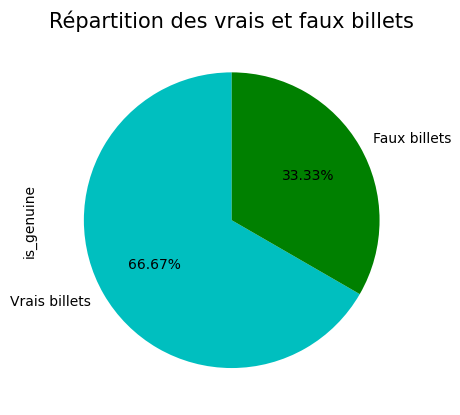

In [16]:
# visualisation de la nature par billets
# sns.countplot(x = data_billets["is_genuine"])
data_billets["is_genuine"].value_counts().plot(kind = "pie",autopct='%1.2f%%', 
                                               labels = ["Vrais billets","Faux billets"],colors = ["c", "g"], startangle=90)
plt.title("Répartition des vrais et faux billets", fontsize=15)
plt.show()

### 2.1.2. Visualisation des données pour afficher leur distribution et s'il exite des valeurs aberrantes.

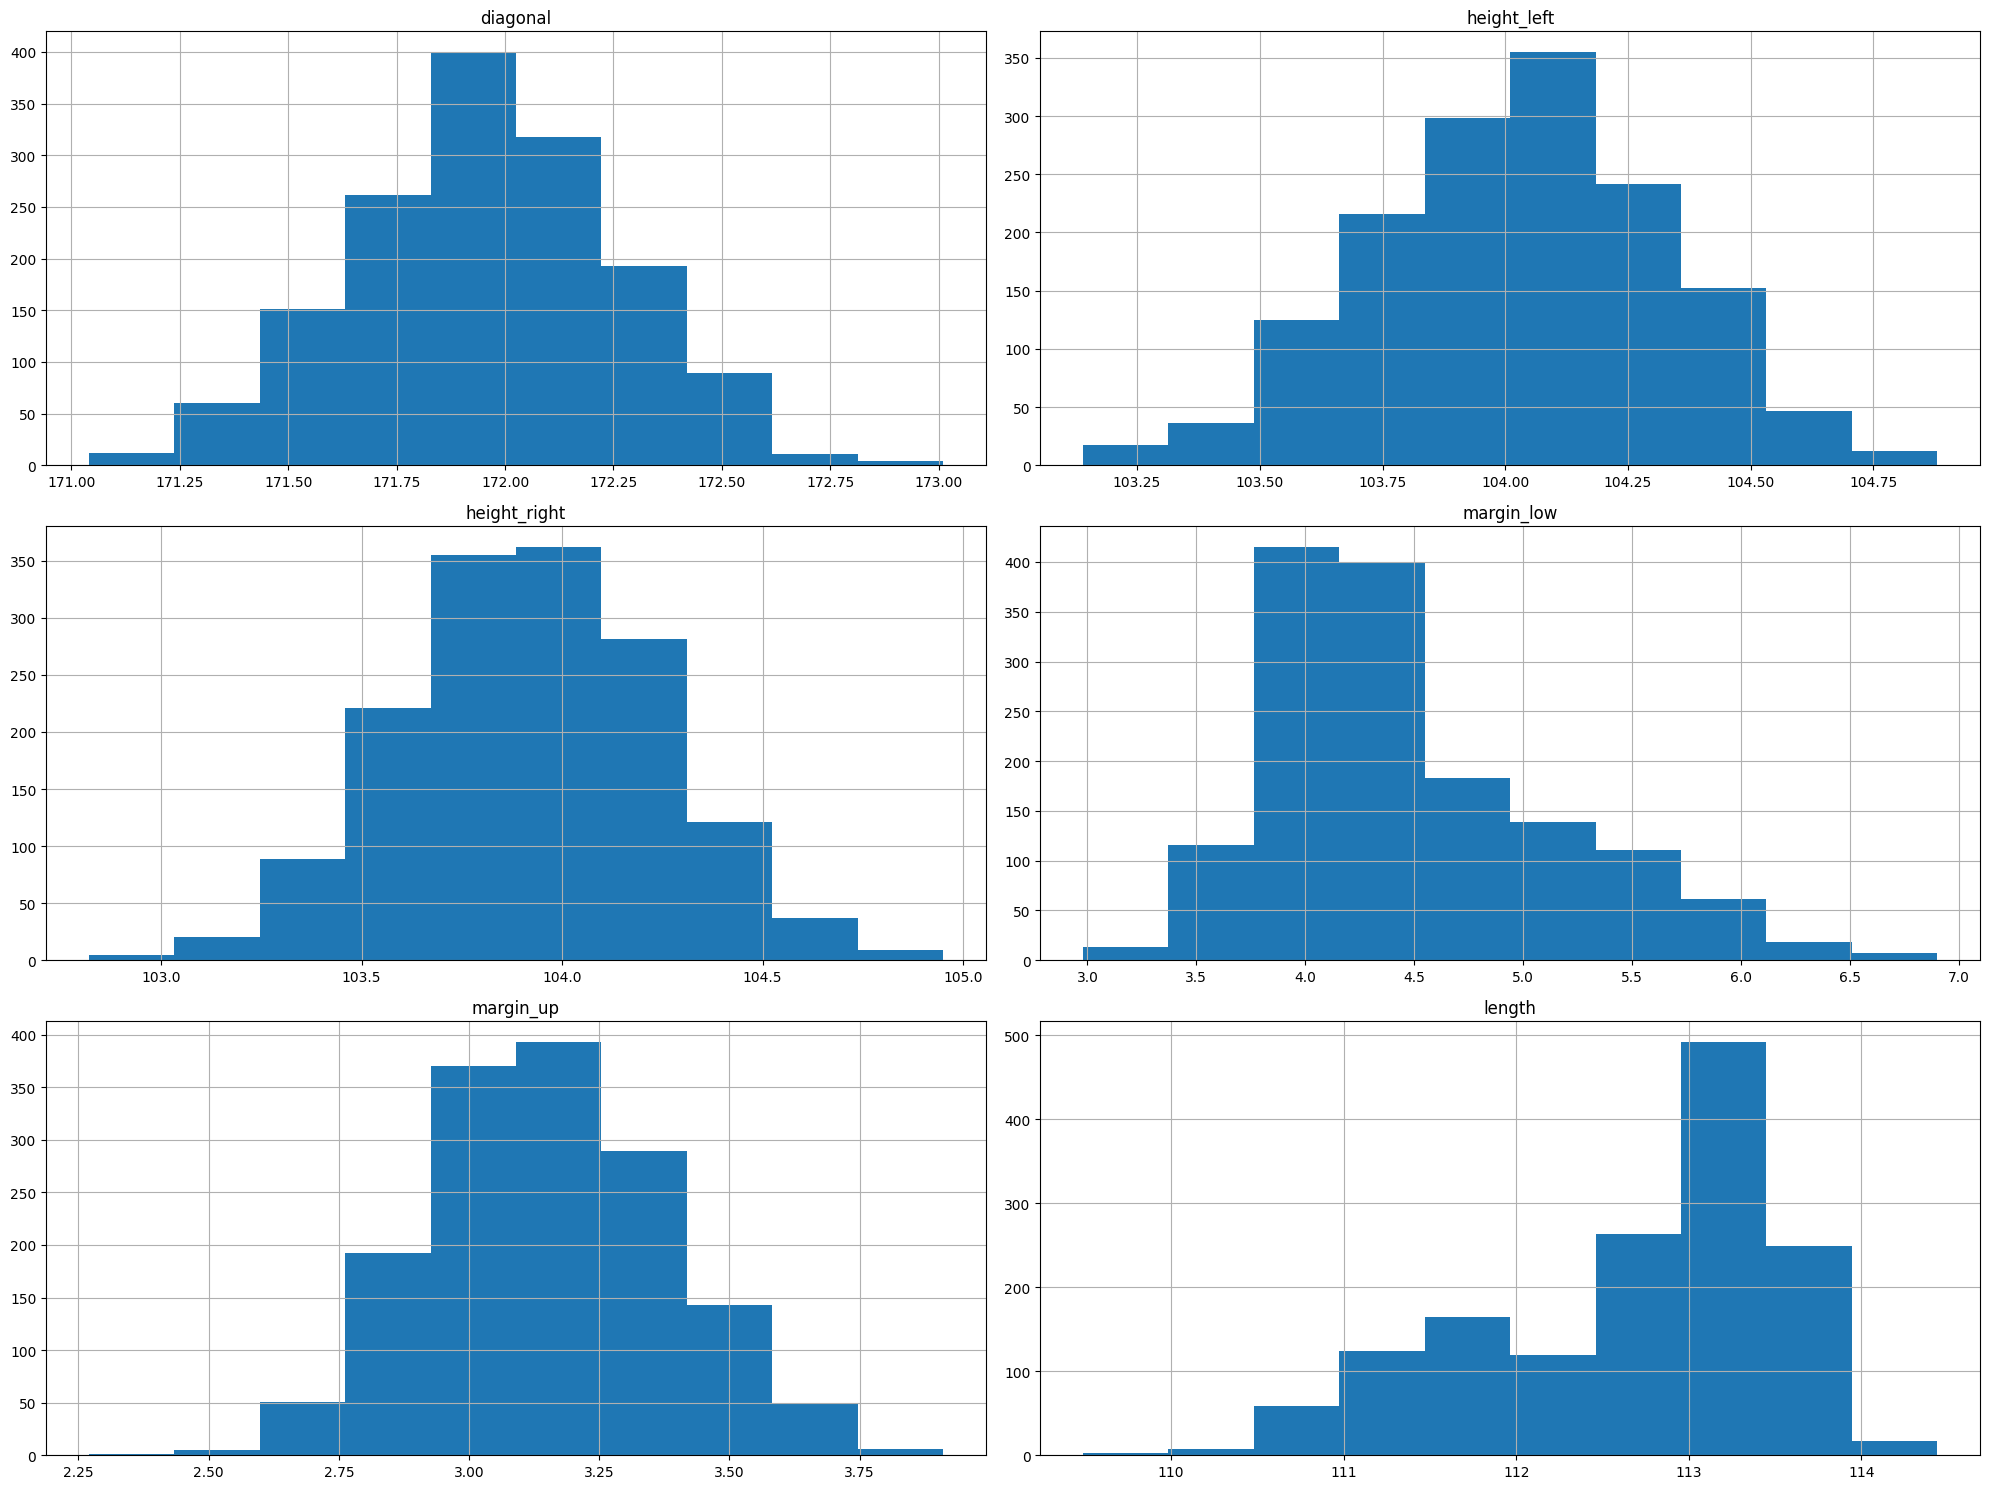

In [17]:
# Visualisation
data_billets.hist(figsize=(20,15))
plt.show
plt.tight_layout()

In [18]:
# test de normalité
pg.normality(data_billets, method ='normaltest')

,W,pval,normal
is_genuine,10237.515769,0.000000e+00,False
diagonal,1.283885,5.262691e-01,True
height_left,4.890882,8.668792e-02,True
height_right,0.024994,9.875808e-01,True
margin_low,142.278435,1.272420e-31,False
margin_up,9.995290,6.753835e-03,False
length,137.230524,1.587707e-30,False


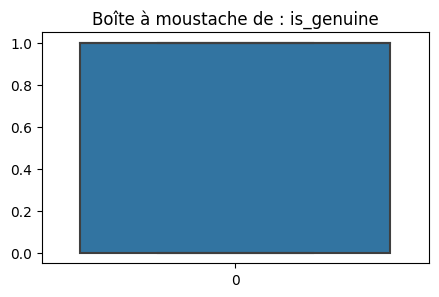

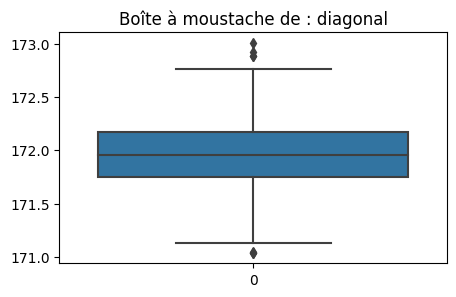

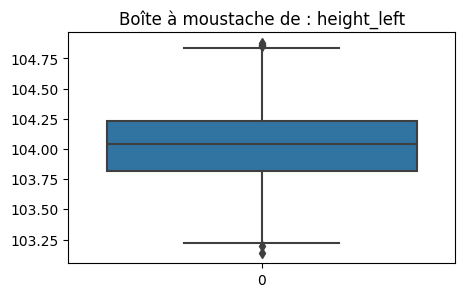

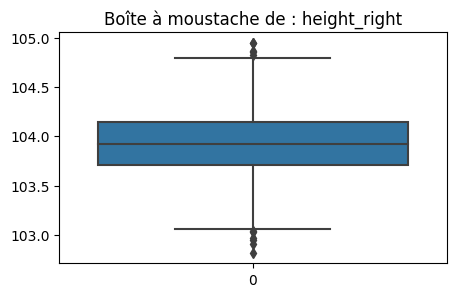

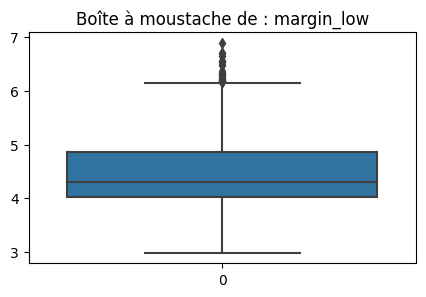

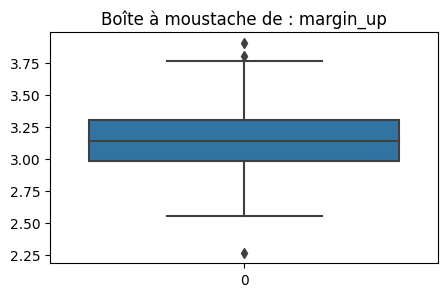

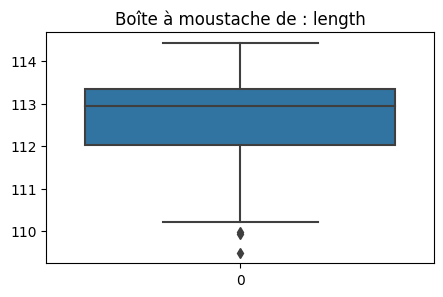

In [19]:
# boites à moustache pour afficher les outliers
for col in data_billets.columns:
    #print(col)
    plt.figure(figsize=(5,3)) 
    sns.boxplot(data_billets[col], showfliers = True)
    plt.title('Boîte à moustache de : ' + str(col)) 

* Nous remarquons la présence de plusieurs valeurs abérrantes en plus les données ne suivent pas une distribution normale.
* Nous pouvons créer une fonction Python simple qui prend notre colonne à partir de la trame de données et génère les valeurs aberrantes :
***
* Etant donné que les données ne suivent pas une distribution normale, nous calculerons les points de données aberrants à l'aide de la méthode statistique appelée intervalle interquartile (IQR) au lieu d'utiliser le score Z.

## 2.2. Gestion des valeurs manquantes et outliers

### 2.2.1.a) Détecter les valeurs manquantes

* Il est important d’identifier les données manquantes dans un jeu de données avant d’appliquer un algorithme de Machine Learning (ML).
* En effet, beaucoup de ces derniers reposent sur des méthodes statistiques qui supposent recevoir un jeu de données complet en entrée.
* L’imputation de données manquantes réfère au fait qu’on remplace les valeurs manquantes dans le jeu de données par des valeurs artificielles.
* Idéalement, ces remplacements ne doivent pas conduire à une altération sensible de la distribution et la composition du jeu de données. dans notre cas on va faire une imputation par regression linéaire (dans le cas d'une variable qualitative nous allons faire une imputation avec la régression logistique).

In [20]:
# Créer un dataframe avec les données manquantes (NAN)
billets_null = data_billets[data_billets.isnull().any(axis=1)]
print(billets_null.shape)

# afficher les données
billets_null.head(37)

(37, 7)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


In [21]:
# Suppression de ces valeurs manquantes
df_billets_non_null = data_billets.dropna()
print(df_billets_non_null.isnull().sum())
print("-----------------------------")
print(df_billets_non_null.shape)
df_billets_non_null.head(5)

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64
-----------------------------
(1463, 7)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


Nous n'avions plus de valeurs manquantes dans nos données.

* Pour tracer plusieurs distributions bivariées par paires dans un ensemble de données, vous pouvez utiliser la fonction  "pairplot()".
* Les tracés diagonaux sont les tracés univariés, et cela affiche la relation pour la combinaison (n, 2) de variables dans un DataFrame sous forme de matrice de tracés.

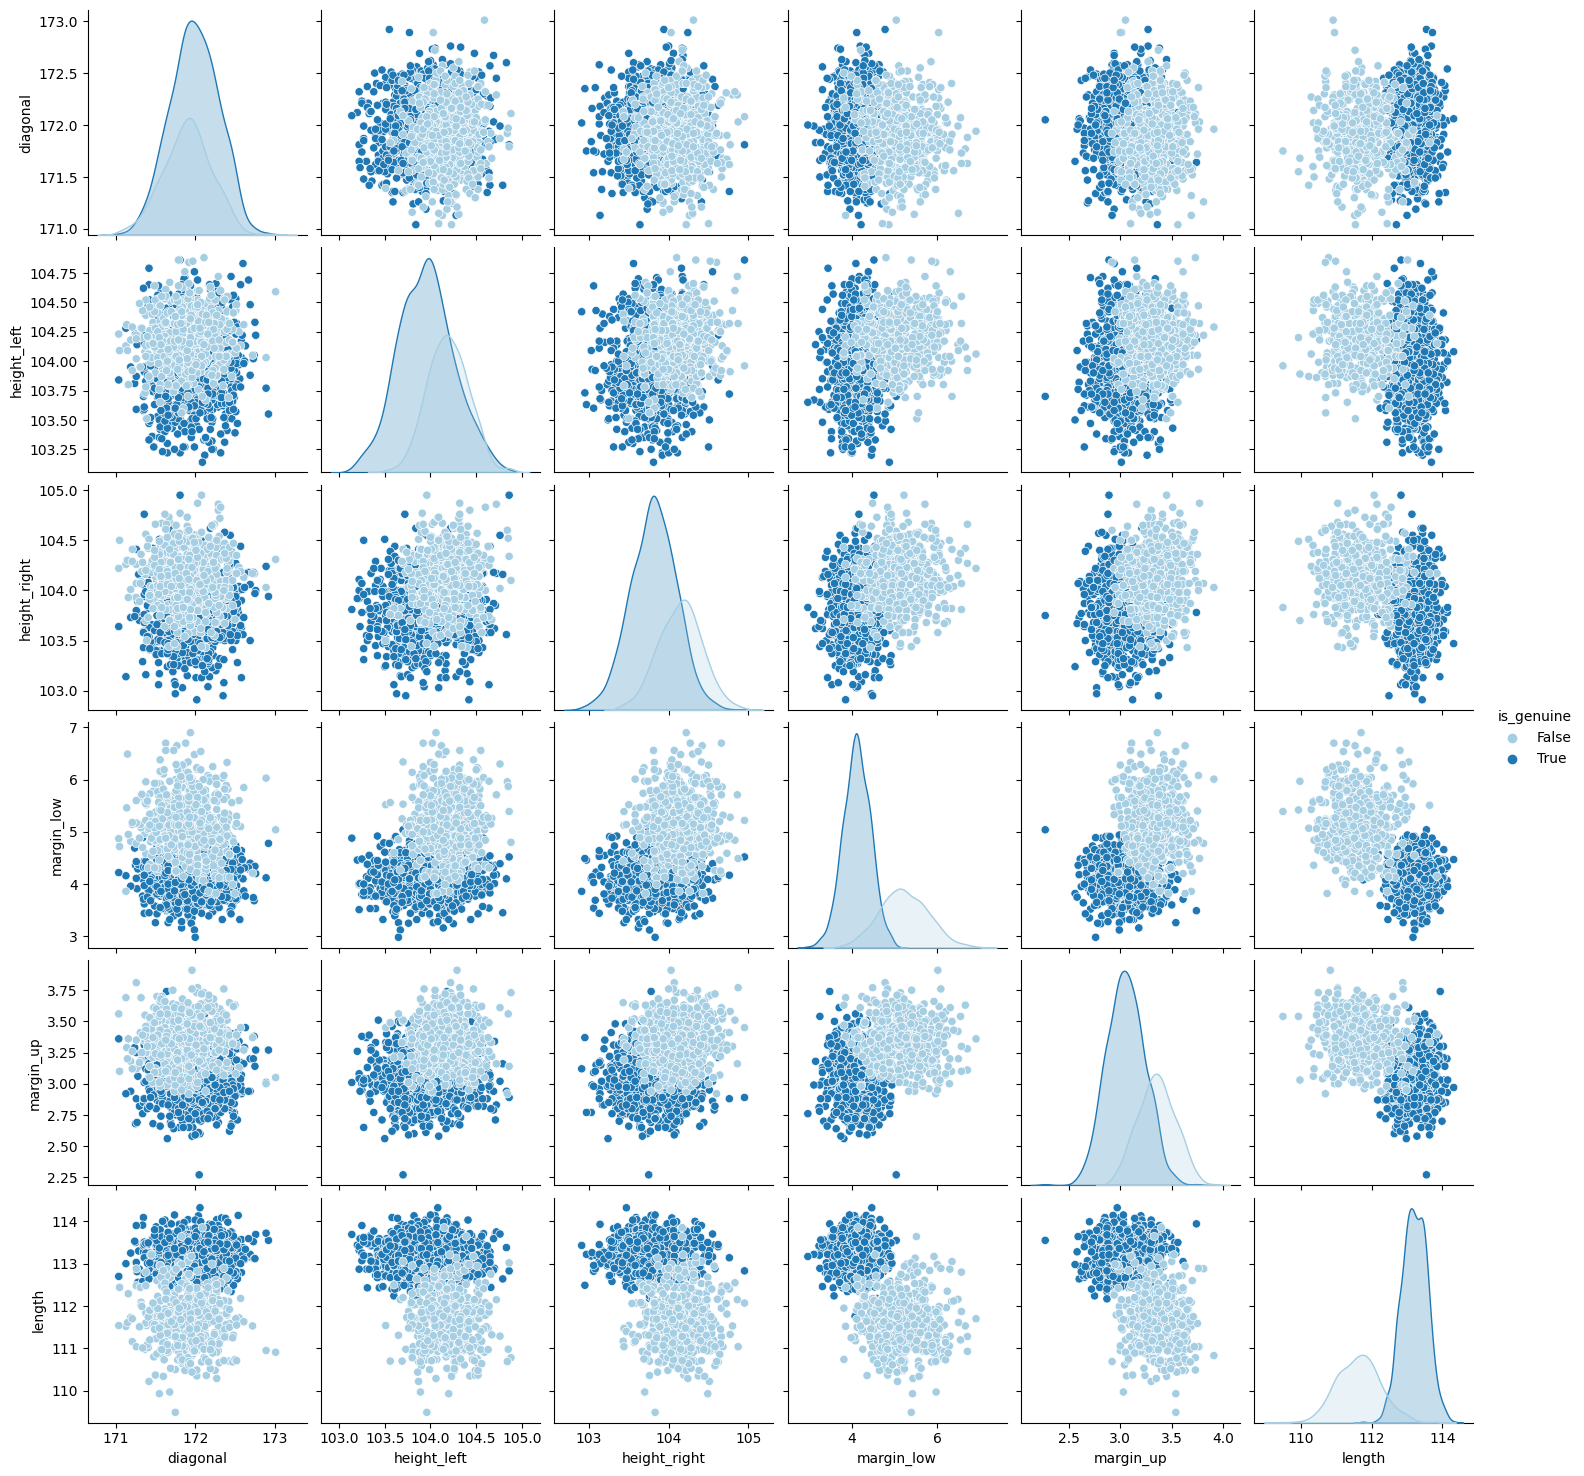

In [22]:
# Visualisation des données numériques (absence de valeurs manquantes)
sns.pairplot(df_billets_non_null, hue = "is_genuine", palette = "Paired")
#plt.savefig("Visualisation des données numériques.png")
#plt.legend()
plt.show()

* La diagonale suit une distribution normale;
* Les faux billets se distinguent par rapport aux autres dimensions comme sur la marge et l'image;
* De même que au niveaux des hauteurs (mesurée sur le côté gauche et sur le côté droit).

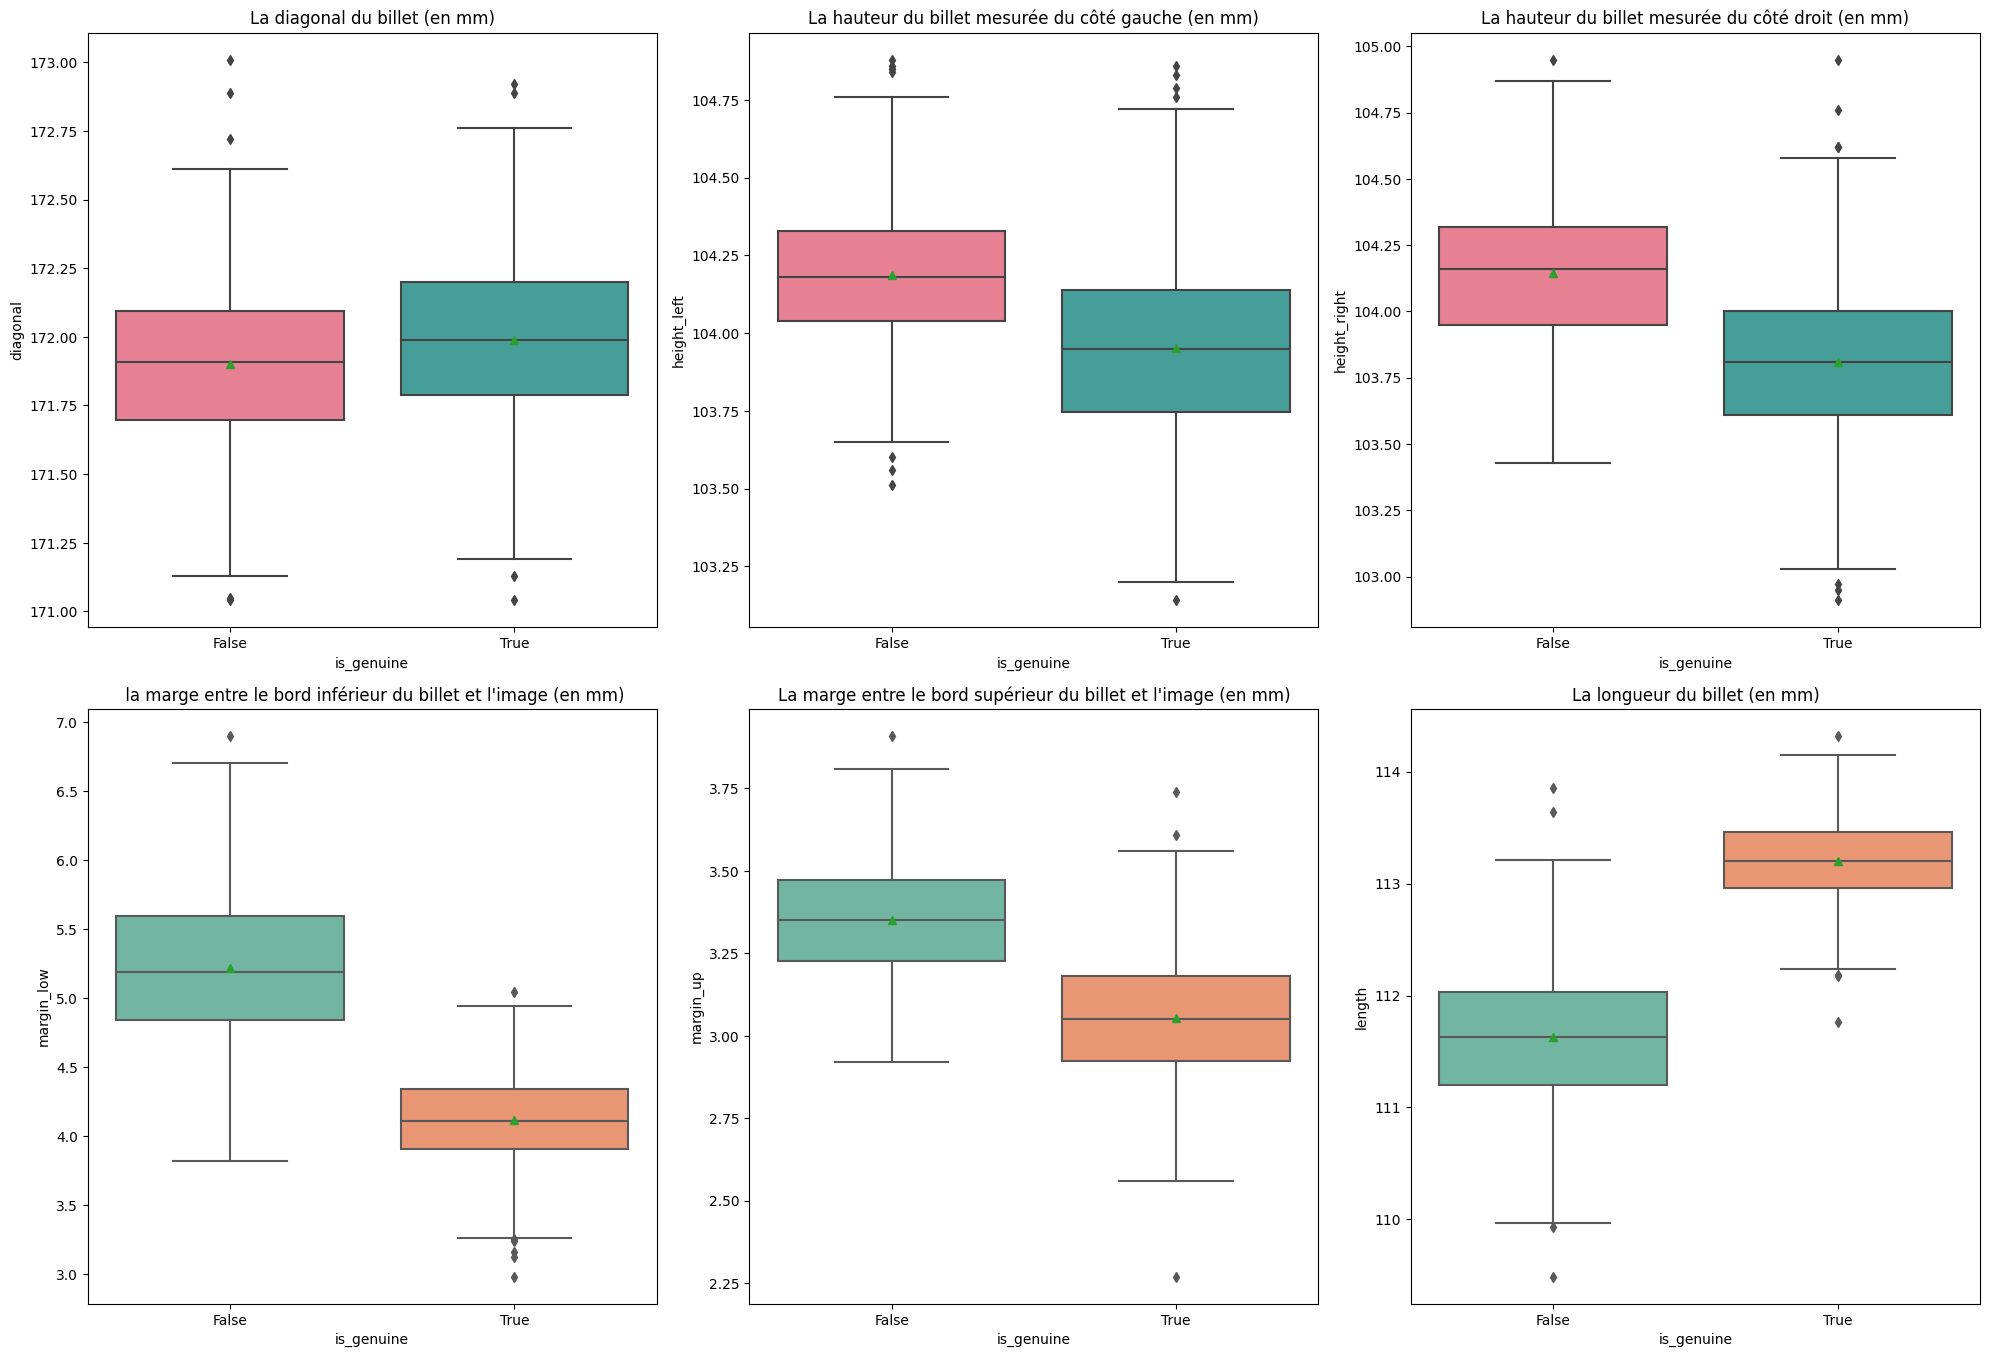

In [23]:
# Visualisation
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = "is_genuine", y = 'diagonal', data = df_billets_non_null, showmeans = True, palette = "husl")
plt.title("La diagonal du billet (en mm)")

plt.subplot(3,3,2)
sns.boxplot(x = "is_genuine", y = 'height_left', data = df_billets_non_null, showmeans = True, palette = "husl")
plt.title("La hauteur du billet mesurée du côté gauche (en mm)")

plt.subplot(3,3,3)
sns.boxplot(x = "is_genuine", y = 'height_right', data = df_billets_non_null, showmeans = True, palette = "husl")
plt.title("La hauteur du billet mesurée du côté droit (en mm)")

plt.subplot(3,3,4)
sns.boxplot(x = "is_genuine", y = 'margin_low', data = df_billets_non_null, showmeans = True, palette = "Set2")
plt.title(" la marge entre le bord inférieur du billet et l'image (en mm)")

plt.subplot(3,3,5)
sns.boxplot(x = "is_genuine", y = 'margin_up', data = df_billets_non_null, showmeans = True, palette = "Set2")
plt.title("La marge entre le bord supérieur du billet et l'image (en mm)")

plt.subplot(3,3,6)
sns.boxplot(x = "is_genuine", y = 'length', data = df_billets_non_null, showmeans = True, palette = "Set2")
plt.title("La longueur du billet (en mm)")

plt.tight_layout()

### 2.2.2. Relation entre nos variables quantitatives

* Nous allons faire une analyse bivariée c'est à dire voir s'il exite des corrélations linéaire entre les différentes variables quantitatives,
* Si on observe des variables qui sont fortement corrélées entres elles, donc nous allons supprimer l'une et garder l'autre afin d'éviter le problème de multicolinéarité au niveau des modèles.
* Pour celà nous allons les visualiser avec la matrix de corrélation sans valeurs manquantes.

<AxesSubplot: >

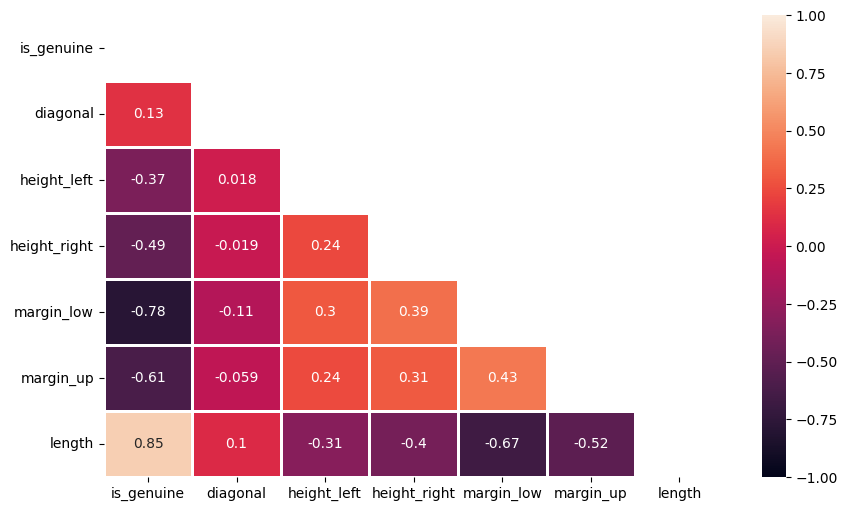

In [24]:
# Visualisation de la matrix de corrélation
plt.figure(figsize = (10, 6))
mask = np.triu(np.ones_like(df_billets_non_null.corr(), dtype=bool))
sns.heatmap(df_billets_non_null.corr(), mask = mask, vmin = -1, vmax = 1, annot = True, linewidths = 2)

* Nous remarquons une forte corrélation négative entre la longueur des billets et la marge entre le bord inférieur du billet et l'image de celui-ci (en mm).
* Pour cela nous allons compléter les valeurs manquantes de l’une (margin_low) en utilisant les valeurs disponibles de l’autre en faisant une simple régression.

# 3. Modélisation

## 3.1. Préparation des données (Diviser les données)

* Les algorithmes de Machine Learning ne fonctionnent pas avec des variables qualitatives (catégorielles) mais plutôt avec des variables quantitatives (numériques);
* Pour celà nous allons remplacer ces variables qualitatives en variables quantitatives. 

In [25]:
# remplacer les données de la colonne "is genuine" par des nombres 
# data_billets['is_genuine'] = data_billets['is_genuine'].replace(["True", "False"], [1, 0])
# data_billets.head(3)

In [26]:
# Faire des copy
data_1 = df_billets_non_null.copy()
data_2 = df_billets_non_null.copy()

In [27]:
# Features = variables indépendantes
X1 = data_1.drop(columns = ['is_genuine', 'margin_low'], axis = 1)

# Variable cible = variable dépendante
y1 = data_1['margin_low']

# Affichage
print(X1.shape)
print(y1.shape)

(1463, 5)
(1463,)


In [28]:
# Afficher les 5 premières lignes
data_1.head(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [29]:
# Données d'entrainement et de test
seed = 42
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state= seed)
print("X1_train shape:", X1_train.shape)
print("X1_test shape:", X1_test.shape)
print("y1_train shape:", y1_train.shape)
print("y1_test shape:", y1_test.shape)

X1_train shape: (1097, 5)
X1_test shape: (366, 5)
y1_train shape: (1097,)
y1_test shape: (366,)


In [30]:
# Standardisation
scaler = StandardScaler()
scaler.fit(X1_train)
X1_train = pd.DataFrame(scaler.transform(X1_train), columns = X1.columns)
X1_test = pd.DataFrame(scaler.transform(X1_test), columns = X1.columns)

## 3.2. Modèle de régression linéaire multiple pour remplacer les valeurs manquantes

* L'analyse de régression linéaire est utilisée pour créer un modèle qui décrit la relation entre une variable dépendante et une ou plusieurs variables indépendantes.
* Selon qu'il y a une ou plusieurs variables indépendantes, on distingue l'analyse de régression linéaire simple et l'analyse de régression linéaire multiple.
* Dans le cas d'une régression linéaire simple, l'objectif est d'examiner l'influence d'une variable indépendante sur une variable dépendante.
* Dans le second cas, une régression linéaire multiple, on analyse l'influence de plusieurs variables indépendantes sur une variable dépendante.

*Nous allons voir si ces variables indépendantes (features) ont-ils une influence sur la variable dépendante (variable cible)?*

In [31]:
# Instancier le modèle (appel à la modèle)
model_lr = LinearRegression()

# Appliquer le modèle
model_lr.fit(X1_train, y1_train)

LinearRegression()

* Nous avons déjà entrainer le modèle sur les données d'entrainement, mainteneant nous allons faire la prédiction sur les données tests.

In [32]:
# Prédire sur les variables indépendantes
y1_pred = model_lr.predict(X1_test)
y1_pred

array([4.9719938 , 4.32060825, 4.37913651, 4.08485109, 3.99473007,
       4.10550182, 4.8633962 , 4.12835769, 4.20083126, 3.84423248,
       5.15710903, 4.13276781, 4.44612761, 4.07519239, 5.92284997,
       4.10281131, 4.13550702, 3.96000362, 4.16681491, 5.12133544,
       4.22740161, 4.78376369, 5.02461204, 4.10662824, 4.07283502,
       3.9990217 , 4.19889546, 4.09784931, 4.92204552, 4.25165618,
       5.09784271, 4.14454695, 4.50082335, 4.2010617 , 3.99018342,
       4.17196253, 3.96440647, 5.60693982, 5.7236242 , 4.14695674,
       4.26567669, 4.40005619, 4.79686092, 4.46952609, 5.37236279,
       4.41942289, 4.73217975, 4.93891156, 4.2504424 , 4.72123787,
       4.28417637, 4.21237749, 3.9322601 , 4.10684173, 4.34748421,
       4.21130536, 4.1522254 , 4.39045344, 4.16667002, 5.3865902 ,
       3.82712717, 4.99470947, 4.05064894, 4.30039115, 4.57563274,
       4.24955481, 3.89773944, 5.26563888, 5.23718184, 3.98104026,
       4.92345799, 4.38842946, 5.09388057, 4.26985189, 4.01452

### 3.2.1. Comparer les valeurs prédites par notre modèle aux valeurs réelles

In [33]:
# valeurs réelles 
print("y1_test \n", y1_test)
print("\n ============================== \n")
# Valeurs prédites par le modèle
print("y1_pred \n", y1_pred)

y1_test 
 1208    5.19
178     4.26
281     4.18
561     3.93
891     4.25
        ... 
841     3.69
907     4.04
1428    5.09
248     4.38
1369    4.60
Name: margin_low, Length: 366, dtype: float64


y1_pred 
 [4.9719938  4.32060825 4.37913651 4.08485109 3.99473007 4.10550182
 4.8633962  4.12835769 4.20083126 3.84423248 5.15710903 4.13276781
 4.44612761 4.07519239 5.92284997 4.10281131 4.13550702 3.96000362
 4.16681491 5.12133544 4.22740161 4.78376369 5.02461204 4.10662824
 4.07283502 3.9990217  4.19889546 4.09784931 4.92204552 4.25165618
 5.09784271 4.14454695 4.50082335 4.2010617  3.99018342 4.17196253
 3.96440647 5.60693982 5.7236242  4.14695674 4.26567669 4.40005619
 4.79686092 4.46952609 5.37236279 4.41942289 4.73217975 4.93891156
 4.2504424  4.72123787 4.28417637 4.21237749 3.9322601  4.10684173
 4.34748421 4.21130536 4.1522254  4.39045344 4.16667002 5.3865902
 3.82712717 4.99470947 4.05064894 4.30039115 4.57563274 4.24955481
 3.89773944 5.26563888 5.23718184 3.98104026 4.923457

### 3.2.2. Evaluation de la performance du modèle de régression linéaire

* Afin de déterminer dans quelle mesure le modèle de régression peut prédire ou expliquer la variable dépendante, deux mesures principales sont utilisées. Il s'agit, d'une part, du coefficient de détermination R² et, d'autre part, de l'erreur d'estimation standard.
* Le coefficient de détermination R², également connu sous le nom d'explication de la variance, indique l'importance de la part de la variance qui peut être expliquée par les variables indépendantes (Le R² mesure la capacité du modèle à prédire les variations de y).
* Plus la variance peut être expliquée, meilleur est le modèle de régression. Pour calculer R², la variance de la valeur estimée est liée à la variance des valeurs bservées.

### 3.2.1.a) Coefficient de détermination

* R² = 1: le modèle effectue des prédictions parfaites (il a un MSE = 0).
* R² = 0: le modèle a la même MSE qu’un modèle prédisant la valeur moyenne 
* R² > 0: le modèle est meilleur qu’un modèle prédisant la valeur moyenne 
* R² < 0: le modèle est moins bon qu’un modèle prédisant la valeur moyenne 

In [34]:
# Vérifier le score du modèle avant la prédiction
# Evaluer le taux de précision du modèle
R1_score_train = model_lr.score(X1_train, y1_train)
print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print(f'Le R1_score_train est égal à:  {R1_score_train:.3f}')

La performance du modèle sur la base d'apprentissage
--------------------------------------
Le R1_score_train est égal à:  0.470


In [35]:
# Evaluer le taux de précision du modèle
R1_score_test = r2_score(y1_test, y1_pred)
print("La performance du modèle sur la base test et pédictive")
print('--------------------------------------')
print(f'Le R1_score_test est égal à: {R1_score_test:.3f}')

La performance du modèle sur la base test et pédictive
--------------------------------------
Le R1_score_test est égal à: 0.501


In [36]:
# Vérifier le score du modèle avant la prédiction
# Evaluer le taux de précision du modèle
#R1_score = model_lr.score(X1,y1)
#print(f'R1_score = {R1_score:.3f}')

* Nous obtenons R² = 47% de la part de la variance expliquée par les variables indépendantes sur les données d'apprentissage, avec 50.10% sur les données test;
* Cela signifie que le modèle mathématique utilisé n’explique absolument pas la distribution des points;
* Pour celà nous allons réaliser des test statistiques pour confirmer ou infirmer le résultat du modèle utilisé c'est à dire voir s'il exite une relation linéaire.

### 3.2.1.b) Erreur d'estimation standard (L'erreur quadratique)

* L'erreur d'estimation standard est l'écart-type de l'erreur d'estimation. Elle donne une idée de l'ampleur de l'écart entre la prédiction et la valeur correcte (La MSE mesure l’écart moyen entre la prédiction d’un modèle et la valeur réelle attendue).
* Interprétée graphiquement, l'erreur standard d'estimation est la dispersion des valeurs observées autour de la ligne de régression.
* Le coefficient de détermination et l'erreur d'estimation standard sont utilisés pour les régressions linéaires simples et multiple.

In [37]:
# Evaluer le taux de précision du modèle
#R2_score = r2_score(y1_test, y1_pred)
#print(f'R2_score = {R2_score:.3f}')

In [38]:
# l’écart moyen entre la prédiction d’un modèle et la valeur réelle attendue
# MSE_train = mean_squared_error(y1_train, y1_train_pred)
y1_train_pred = model_lr.predict(X1_train)
RMSE_train = np.sqrt(mean_squared_error(y1_train, y1_train_pred))
print(f"L'erreur quadratique moyenne sur la base d'apprentissage est RMSE_train = {RMSE_train:.3f}")

L'erreur quadratique moyenne sur la base d'apprentissage est RMSE_train = 0.486


In [39]:
# l’écart moyen entre la prédiction d’un modèle et la valeur réelle attendue
y1_test_pred = model_lr.predict(X1_test)
RMSE_test = np.sqrt(mean_squared_error(y1_test, y1_test_pred))
print(f"L'erreur quadratique moyenne sur la base test est RMSE_test = {RMSE_test:.3f}")

L'erreur quadratique moyenne sur la base test est RMSE_test = 0.460


4.482142206016408
[-0.02808152  0.05805225  0.08831085  0.06212925 -0.35140884]


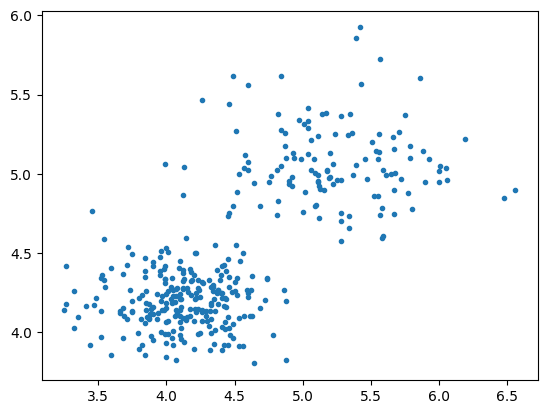

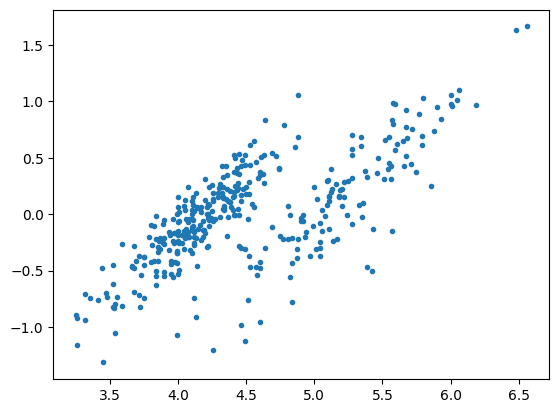

In [40]:
print(model_lr.intercept_)
print(model_lr.coef_)

# visualisation
#plt.scatter(y1_test, y1_pred)
plt.plot(y1_test, y1_pred, ".")
plt.show()

# visualisation
plt.plot(y1_test, y1_test - y1_pred, ".")
plt.show()

# Autre méthode

* On utilise "statsmodel" car il nous permet d'avoir un resumé des statistiques de notre regression multiple sous forme d'un tableau, ce que nous n'avons pas avec sklearn.

In [41]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

In [42]:
# La formule (initiation de la formule)
model = smf.ols("margin_low ~ diagonal + height_left + height_right + margin_up + length", data = data_billets)

# Appliquer la formule sur les données
reg_multi = model.fit()

# Afficher le résumé
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Wed, 25 Oct 2023   Prob (F-statistic):          2.60e-202
Time:                        10:33:47   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

* On constate ici que tous les paramètres sont significativement différents de 0, car leur p-valeur est  inférieure à 5 %, le niveau de test que nous souhaitons.

* Le $R^{2}$ vaut environ 0.47, et le $R^{2}$ ajusté est d'environ 0.47.

*Cette valeur est plus élevée qu'en régression linéaire simple, et c'est logique, car lorsque l'on rajoute des variables explicatives potentielles, on accroît naturellement la valeur de ces $R^{2}$.*

*Pour cela , nous n'allons pas retirer aucune de ces variables (absence de variables non significatives) mais plutôt les garder c'est à dire que ces variables sont statistiquement significatives*.

## 3.4. Aller plus loin : analysez vos résultats avec les conditions préalables de la régression linéaire

*Afin d'interpréter les résultats de l'analyse de régression de manière significative, certaines conditions doivent être remplies.*

* Linéarité : il doit exister une relation linéaire entre les variables dépendantes et indépendantes.
* Absence de multicolinéarité : il n'existe pas de forte corrélation entre les variables indépendantes.
* Homoscédasticité : les résidus doivent avoir une variance constante.
* Normalité : l'erreur est normalement distribuée.
* Pas d'auto-corrélation : la composante d'erreur ne doit pas présenter d'auto-corrélation

### 3.4.a) Testez la Linéarité

* On fait l'hypothèse qu'il existe une relation linéaire entre les variables indépendantes et la variable dépendante. 
* Non verifée ici.
* Il est donc important de vérifier au préalable s'il existe une relation linéaire entre la variable dépendante et chacune des variables indépendantes.
* Cette vérification se fait généralement sous forme de graphique.

In [43]:
import pingouin as pg
pg.normality(data_billets, method = 'normaltest', alpha=0.05)

,W,pval,normal
is_genuine,10237.515769,0.000000e+00,False
diagonal,1.283885,5.262691e-01,True
height_left,4.890882,8.668792e-02,True
height_right,0.024994,9.875808e-01,True
margin_low,142.278435,1.272420e-31,False
margin_up,9.995290,6.753835e-03,False
length,137.230524,1.587707e-30,False


In [44]:
#Le choix s'est porté sur un test de Levene car il est plus efficace lorsque les distributions ne suivent pas une loi normale. 
#Dans le cas contraire, nous aurions utilisé un test de Bartlett.
pg.homoscedasticity(df_billets_non_null, method ='levene', alpha=0.05)

,W,pval,equal_var
levene,353.805937,0.0,False


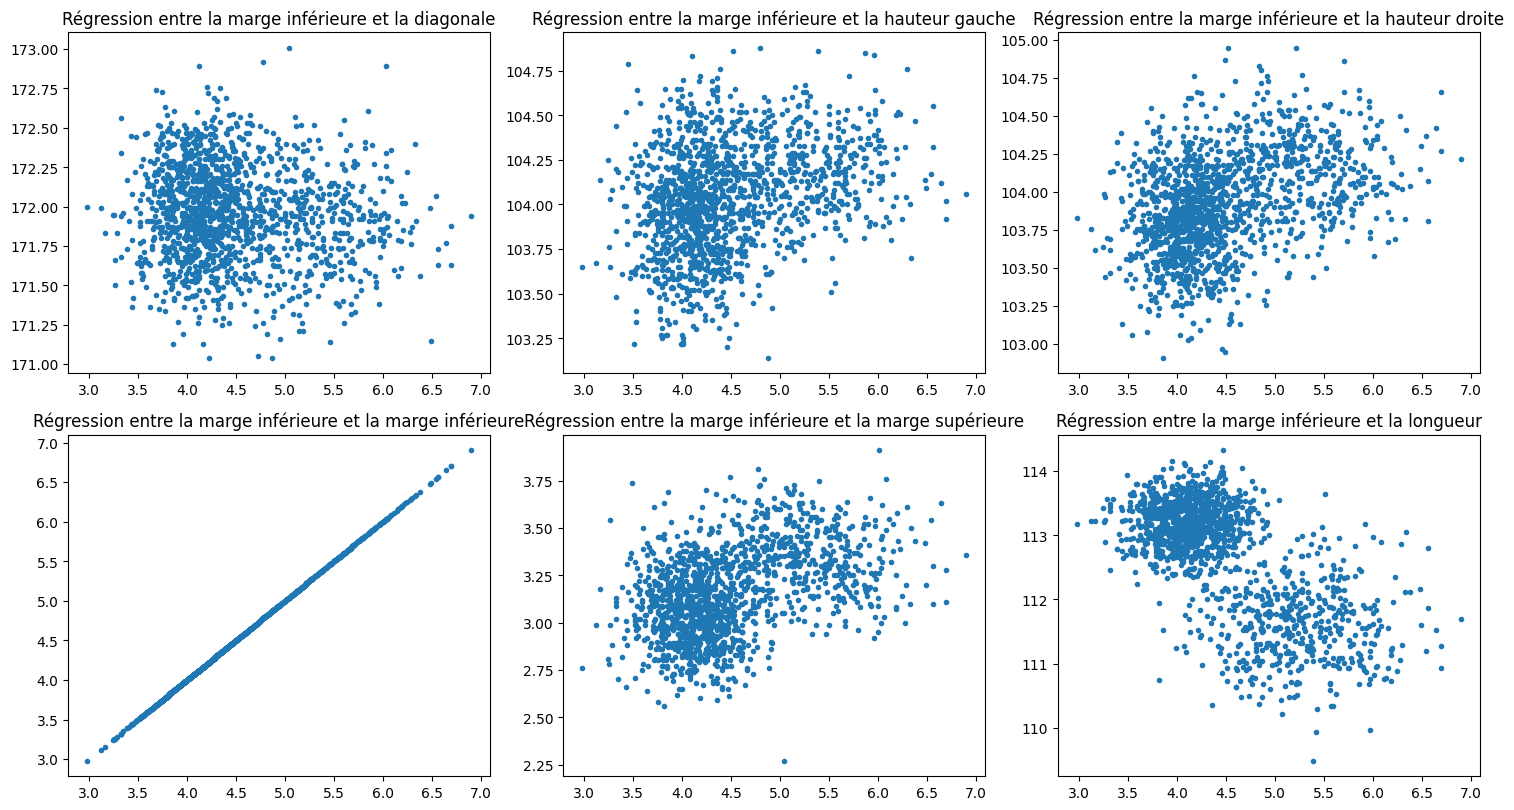

In [45]:
# Visualisation
plt.figure(figsize=(15,12))
plt.subplot(3,3,1)
#sns.lmplot(x = "margin_low", y = ["diagonal"], data = data_billets)
plt.plot(data_billets["margin_low"], data_billets["diagonal"], ".")
plt.title("Régression entre la marge inférieure et la diagonale")

plt.subplot(3,3,2)
plt.plot(data_billets["margin_low"], data_billets["height_left"], ".")
plt.title("Régression entre la marge inférieure et la hauteur gauche")

plt.subplot(3,3,3)
plt.plot(data_billets["margin_low"], data_billets["height_right"], ".")
plt.title("Régression entre la marge inférieure et la hauteur droite")

plt.subplot(3,3,4)
plt.plot(data_billets["margin_low"], data_billets["margin_low"], ".")
plt.title("Régression entre la marge inférieure et la marge inférieure")

plt.subplot(3,3,5)
plt.plot(data_billets["margin_low"], data_billets["margin_up"], ".")
plt.title("Régression entre la marge inférieure et la marge supérieure")

plt.subplot(3,3,6)
plt.plot(data_billets["margin_low"], data_billets["length"], ".")
plt.title("Régression entre la marge inférieure et la longueur")

plt.tight_layout()

In [46]:
# Afficher les colonnes
data_billets.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [47]:
# pas de valeurs manquantes pour tester la régression 
lm = pg.linear_regression(X1, y1)
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,22.99,9.66,2.38,0.02,0.48,0.48,4.05,41.94
1,diagonal,-0.11,0.04,-2.68,0.01,0.48,0.48,-0.19,-0.03
2,height_left,0.18,0.04,4.11,0.00,0.48,0.48,0.10,0.27
3,height_right,0.26,0.04,5.98,0.00,0.48,0.48,0.17,0.34
4,margin_up,0.26,0.06,3.98,0.00,0.48,0.48,0.13,0.38
5,length,-0.41,0.02,-22.63,0.00,0.48,0.48,-0.44,-0.37


### 3.4.b) Calculez les résidus

* Les résidus ou » erreurs observées » sont définis comme étant les différences entre les valeurs observées et les valeurs estimées par un modèle de régression, ils ont la particularité de représenter la partie non expliquée par l'équation de la régression
* l'hypothèse nulle est que les résidus sont distribués selon une loi Normale.

<AxesSubplot: >

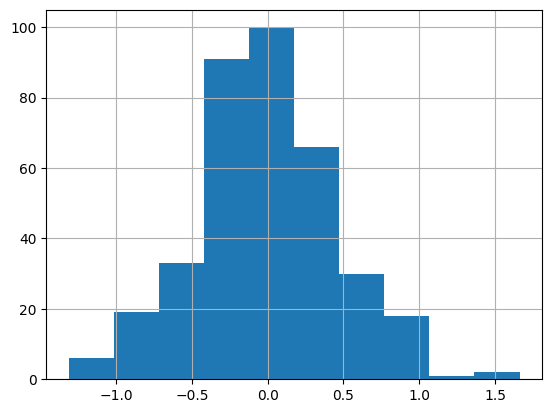

In [48]:
# Prédire sur les variables indépendantes
predict = model_lr.predict(X1_test)

# calcul des résidus
residu = y1_test - predict

# Visualisation
residu.hist()

* Nous observons une distribution peu symetrique puis centrée sur 0.

In [49]:
# Statistiques des résidus
# residu.describe()
residu.describe().round(3)

count    366.000
mean      -0.001
std        0.460
min       -1.314
25%       -0.274
50%       -0.016
75%        0.261
max        1.662
Name: margin_low, dtype: float64

In [50]:
# La moyenne des residus est nulle:
reg_multi.resid.mean()

-1.7272550823357622e-13

* Nous pouvons aussi utiliser d'autres packages comme  "yellowbrick" pour visualiser les résidus.

### 3.4.c) Testez la Colinéarité

* La multicolinéarité se produit lorsqu’il existe deux ou plusieurs variables indépendantes dans un modèle de régression multiple, qui ont une forte corrélation entre elles.
* Lorsque certaines caractéristiques sont fortement corrélées, nous pouvons avoir des difficultés à distinguer leurs effets individuels sur la variable dépendante.
* La multicolinéarité peut être détectée à l’aide de diverses techniques, l’une de ces techniques étant le facteur d’inflation de la variance ( VIF ).

In [51]:
# the independent variables set
X = data_billets[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

        feature            VIF
0      diagonal  169341.929149
1   height_left  112879.408271
2  height_right  100054.247709
3     margin_up     260.785987
4        length   22676.458356


In [52]:
# régression linéaire effectuée
variables = reg_multi.model.exog

# les colonnes
variable = ['diagonal', 'height_left', 'height_right', 'margin_up', 'length']

# Calcul du VIF pour chaque fonctionnalité
vif = [variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

# Créer un dataframe
vif_data = pd.DataFrame([variable, vif]).T.rename(columns={0:'variable', 1:'vif'})
vif_data

,variable,vif
0,diagonal,1.013613
1,height_left,1.138261
2,height_right,1.230115
3,margin_up,1.404404
4,length,1.57695


* Nous observons que tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité.

### 3.4.d) Testez l'homoscédasticité

* On peut également tester l’homoscédasticité (c'est-à-dire la constance de la variance) des résidus

In [53]:
# Test de l’homoscédasticité des résidus
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 7.759535216108084e-16


* La p-valeur ici n'est pas inférieure à $5$%, on ne rejette pas l'hypothèse $H0$ selon laquelle les variances sont constantes (l'hypothèse d’homoscédasticité).

### 3.4.e) Testez la normalité des résidus

* l'hypothèse nulle est que les résidus sont distribués selon une loi Normale.
* Nous allons effectuer un test de Shapiro-Wilk pour tester la normalité des résidus.

In [54]:
# Test de la normalité des résidus
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9857882857322693, pvalue=8.540482210328548e-11)

* Nous obtenons un pvalue (= 8.540482210328548e-11) > 0.05, dans ce cas nous ne pouvons pas rejetter l'hypothèse nulle selon laquelle les résidus suivent une distribution normale.
* Nous pouvons dire que les résidus suivent une loi normale.

### 3.4.f) Déterminez la distance de Cook

* En statistique, la distance de Cook (souvent appelée D de Cook) est une mesure courante de l'influence d'un point de données.
* C'est un moyen de trouver des valeurs aberrantes influentes dans un ensemble de variables prédictives lors de l'exécution d'une analyse de régression par les moindres carrés.

In [55]:
# Nbre de billets = nbre d'observations
n = data_billets.shape[0]
# Nbre de variables
p = 5

analyses = pd.DataFrame({'obs':np.arange(1, n+1)})
#analyses['obs'].astype('float', inplace=True)

In [56]:
influence = reg_multi.get_influence().summary_frame()

In [57]:
analyses['dcooks'] = influence['cooks_d']
seuil_dcook = 5/(n-p)

* On peut détecter les observations influentes comme ceci :

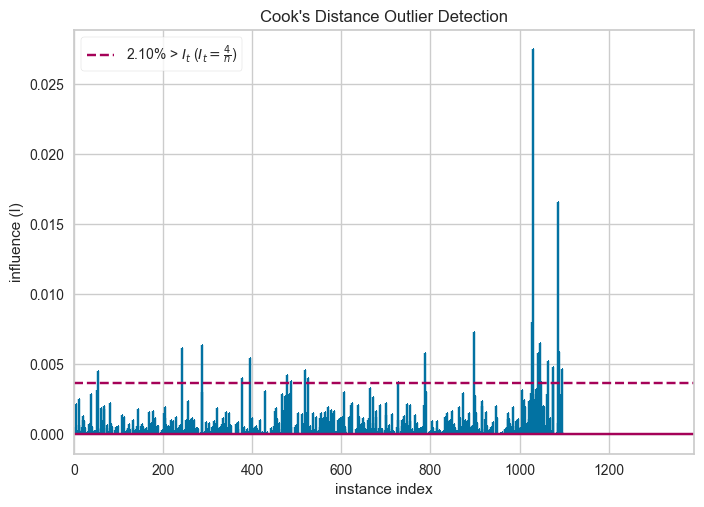

<AxesSubplot: title={'center': "Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [58]:
from yellowbrick.regressor import CooksDistance

# Instantiate and fit the visualizer
visualizer = CooksDistance()
visualizer.fit(X1_train, y1_train)
visualizer.show()

## 3.5. Traitement des valeurs manquantes avec notre modèle

* Nous allons estimer un modèle de régression avec plusieurs variables explicatives et une variable dépendante qui est celle qui contient les valeurs manquantes margin_low ou Y.
* Nous allons calculer un modèle prédictif avec comme variable à prédire Y.
* Ensuite on applique ce modèle pour estimer les différentes valeurs manquantes de Y.

In [59]:
# Prédire sur les variables indépendantes
y1_pred = model_lr.predict(X1_test)
y1_pred

array([4.9719938 , 4.32060825, 4.37913651, 4.08485109, 3.99473007,
       4.10550182, 4.8633962 , 4.12835769, 4.20083126, 3.84423248,
       5.15710903, 4.13276781, 4.44612761, 4.07519239, 5.92284997,
       4.10281131, 4.13550702, 3.96000362, 4.16681491, 5.12133544,
       4.22740161, 4.78376369, 5.02461204, 4.10662824, 4.07283502,
       3.9990217 , 4.19889546, 4.09784931, 4.92204552, 4.25165618,
       5.09784271, 4.14454695, 4.50082335, 4.2010617 , 3.99018342,
       4.17196253, 3.96440647, 5.60693982, 5.7236242 , 4.14695674,
       4.26567669, 4.40005619, 4.79686092, 4.46952609, 5.37236279,
       4.41942289, 4.73217975, 4.93891156, 4.2504424 , 4.72123787,
       4.28417637, 4.21237749, 3.9322601 , 4.10684173, 4.34748421,
       4.21130536, 4.1522254 , 4.39045344, 4.16667002, 5.3865902 ,
       3.82712717, 4.99470947, 4.05064894, 4.30039115, 4.57563274,
       4.24955481, 3.89773944, 5.26563888, 5.23718184, 3.98104026,
       4.92345799, 4.38842946, 5.09388057, 4.26985189, 4.01452

In [60]:
# Remplacer les valeurs manquantes par notre modèle de prédiction
data_billets["margin_low"] = model_lr.predict(data_billets[["diagonal", "height_left", "height_right", "margin_up","length"]])

In [61]:
# la dimmension du dataframe()
print(data_billets.shape)

# Vérifier la présence de valeurs manquantes
data_billets.isnull().sum()

(1500, 7)


is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [62]:
data_billets["margin_low"].unique()

array([-24.45686717, -24.73319138, -24.74454795, ..., -24.24078825,
       -24.33692372, -24.29143505])

In [63]:
data_billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


## 3.6. Traitement des valeurs aberrantes

In [64]:
# Changer le type de donnée
data_billets["is_genuine"] = data_billets["is_genuine"].astype(str)

In [65]:
# Trouvez Q1, Q3 et l'intervalle interquartile pour chaque colonne
Q1 = data_billets.quantile(q = 0.25)
Q3 = data_billets.quantile(q = 0.75)
EIQ = Q3 - Q1
# Définir les limites
LI = Q1 - (EIQ * 1.5)
LS = Q3 + (EIQ * 1.5)

# Appliquer les limites avec la fonction lambda pour la limite inférieure
#df_final = df_final[~((df_final < LI) | (df_final > LS)).any(axis = 1)]

# dataframe des outliers
df_outliers = data_billets[((data_billets < LI) | (data_billets > LS)).any(axis = 1)]
print(df_outliers.shape)
df_outliers.head(5)

(29, 7)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,-24.456867,2.89,112.83
77,True,171.84,104.09,103.03,-24.802415,2.77,113.18
176,True,171.75,103.63,102.97,-24.845947,2.77,113.22
193,True,172.35,103.73,102.95,-24.564951,3.37,112.49
224,True,172.12,103.20,103.92,-24.844271,3.26,113.44


* Nous avons 29 billets (lignes) qui ont tous des valeurs aberrantes,
* Supprimer toutes ces lignes nous fera perdre pas mal d'infomations, le mieux est de les traiter

In [66]:
# Création de la fonction pour faire une imputation 
def impute_outliers_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    upper = df[~ (df > (Q3 + 1.5 * IQR))].max()
    lower = df[~ (df < (Q1 - 1.5 * IQR))].min()
    df = np.where(df > upper,
      df.median(),
      np.where(
        df < lower,
        df.median(),
        df
        )
      )
    return df

In [67]:
# Remplacer les valeurs aberrantes dans chaque colonne
data_billets['diagonal'] = impute_outliers_IQR(data_billets['diagonal'])
data_billets['height_left'] = impute_outliers_IQR(data_billets['height_left'])
data_billets['height_right'] = impute_outliers_IQR(data_billets['height_right'])
data_billets['margin_low'] = impute_outliers_IQR(data_billets['margin_low'])
data_billets['margin_up'] = impute_outliers_IQR(data_billets['margin_up'])
data_billets['length'] = impute_outliers_IQR(data_billets['length'])

In [68]:
# afficher le dataframe final
data_billets.head(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.04,103.92,-24.456867,2.89,112.83
1,True,171.46,103.36,103.66,-24.733191,2.99,113.09
2,True,172.69,104.48,103.50,-24.744548,2.94,113.16
3,True,171.36,103.91,103.94,-24.820077,3.01,113.51
4,True,171.73,104.28,103.46,-24.481309,3.48,112.54


In [69]:
# Les types de données
data_billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   object 
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), object(1)
memory usage: 82.2+ KB


* Nous obtenons un dataframe final propre de 1500 billets avec 7 caractéeristiques (dimensions pour chaque billet).
* Nous pouvons poursuivre pour la suite de notre analyse.

# 4. Appliquer le K-means

In [70]:
# standarliser les données
from sklearn.preprocessing import StandardScaler

# faire une copy
df = data_billets.copy()
# définir une colonne comme index
df = df.set_index("is_genuine")

# Standardiser (center et réduire nos données)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled

array([[-0.49535902,  0.03903802, -0.00296567,  0.22431577, -1.13938604,
         0.1682426 ],
       [-1.66924855, -2.26929722, -0.82911553, -0.60583873, -0.70299572,
         0.4695588 ],
       [ 2.45613465,  1.53266671, -1.33751544, -0.639957  , -0.92119088,
         0.55068239],
       ...,
       [-0.52889872, -0.0628003 ,  0.63253423,  0.87347674,  0.91164848,
        -0.85159683],
       [ 0.3431335 ,  0.85374458,  0.44188426,  0.58465916,  1.3480388 ,
        -0.5039243 ],
       [-1.63570885,  0.41244519, -0.32071561,  0.7213197 ,  0.95528751,
        -0.71252782]])

## 4.1. Détermination du nombre de cluster avec la methode du coude

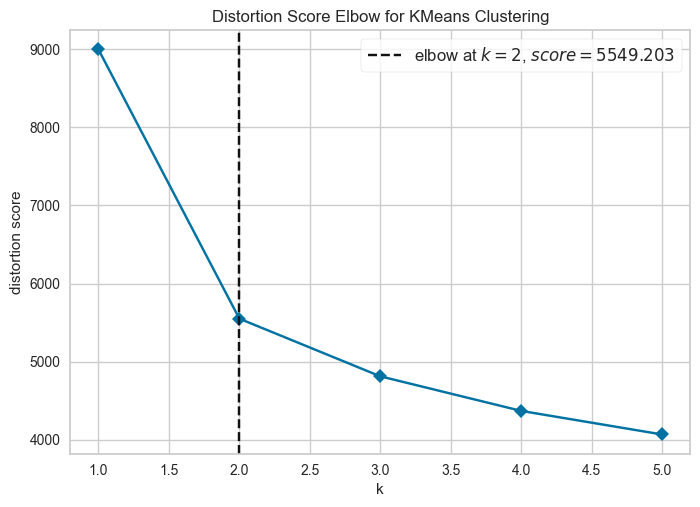

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

# Instancier le modèle de clustering et le visualiseur
model = KMeans(random_state = 42)
visualizer = KElbowVisualizer(model, k = (1,6), metric = 'distortion', timings = False)

# Adapter les données au visualiseur
visualizer.fit(X_scaled)
# Finaliser et rendre la figure
visualizer.show() 

* Grâce à la métric "distorsion" qui calcule la somme des distances au carré de chaque point à son centre attribué nous donne une ségmentation du nombre de clusters K = 2.

## 4.2. Vérifions la séparation des clusters

* Nous allons utiliser le coefficient de silhouette qui va nous permettre de savoir si un point appartient au bon cluster.

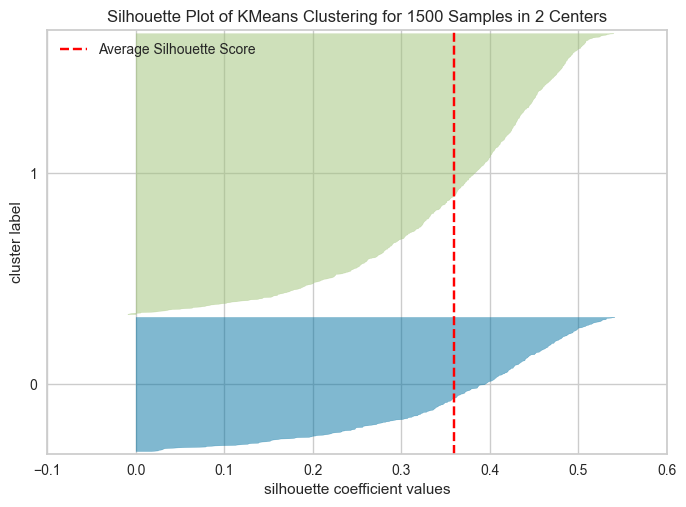

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 1500 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [72]:
# Instancier le modèle de clustering et le visualiseur
model = KMeans(2, random_state = 42)
visualizer = SilhouetteVisualizer(model, colors = 'yellowbrick')

# Adapter les données au visualiseur
visualizer.fit(X_scaled)        
visualizer.show() 

* k = 2 est le nombre de clusters le plus raisonnable avec un coefficient de silhouette = 0.36

* Le score est calculé en faisant la moyenne du coefficient de silhouette pour chaque échantillon, calculé comme la différence entre la distance intra-grappe moyenne et la distance moyenne de la grappe la plus proche pour chaque échantillon, normalisée par la valeur maximale. Cela produit un score entre -1 et +1, où des scores proches de +1 indiquent une séparation élevée et des scores proches de -1 indiquent que les échantillons peuvent avoir été affectés au mauvais cluster.

* Dans notre cas on voit bien la séparation et la répartition des clusters qui sont claires

* Silhouette : calculé comme la différence entre la distance intra-grappe moyenne et la distance moyenne de la grappe la plus proche pour chaque échantillon, normalisée par la valeur maximale

* Nous pouvons aussi essayer d'autres métriques pour pour trouver le meilleur K et faire la comparaison.

In [73]:
# Instancier le modèle de clustering
kmeans_billets = KMeans(n_clusters = 2, init = "k-means++", random_state = 42)

# Adapter (appliquer) aux données 
kmeans_billets.fit(X_scaled)
print(kmeans_billets.fit(X_scaled))

# prédire sur les données entrainées
clusters = kmeans_billets.predict(X_scaled)

# créer un nouveau dataframe
label_billets = pd.DataFrame(X_scaled, columns = df.columns, index = df.index)

# ajouter une nouvelle colonne pour les différents clusters
label_billets["Cluster_Billets"] = clusters
label_billets.head(3)

KMeans(n_clusters=2, random_state=42)


,diagonal,height_left,height_right,margin_low,margin_up,length,Cluster_Billets
is_genuine,,,,,,,
True,-0.495359,0.039038,-0.002966,0.224316,-1.139386,0.168243,1
True,-1.669249,-2.269297,-0.829116,-0.605839,-0.702996,0.469559,1
True,2.456135,1.532667,-1.337515,-0.639957,-0.921191,0.550682,1


In [74]:
# La taille des clusters
cluster_kmeans = label_billets["Cluster_Billets"].value_counts()
cluster_kmeans
print("Nbre de clusters avec le K-means:\n", cluster_kmeans)

Nbre de clusters avec le K-means:
 1    1015
0     485
Name: Cluster_Billets, dtype: int64


In [75]:
# grouper par cluster avec la moyenne
# df_kmeans_clusters = label_billets.groupby("Cluster_Billets").mean().reset_index()
df_kmeans_clusters = label_billets.groupby("Cluster_Billets").mean().reset_index()
df_kmeans_clusters

,Cluster_Billets,diagonal,height_left,height_right,margin_low,margin_up,length
0,0,-0.181261,0.558728,0.711546,1.276478,0.885465,-1.244885
1,1,0.086613,-0.266979,-0.340000,-0.609943,-0.423104,0.594847


In [76]:
# faire une boucle for pour afficher les différents billets
# pour voir quel cluster ils appartiennent
for i in range(2):
    print(f'Cluster_Billets {i}')
    print(label_billets[label_billets.Cluster_Billets == i].index.tolist())
    print()

Cluster_Billets 0
['True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'Fals

In [77]:
# changer le format de la colonne
df_kmeans_clusters["Cluster_Billets"] = df_kmeans_clusters["Cluster_Billets"].astype(str)

In [78]:
df_kmeans_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cluster_Billets  2 non-null      object 
 1   diagonal         2 non-null      float64
 2   height_left      2 non-null      float64
 3   height_right     2 non-null      float64
 4   margin_low       2 non-null      float64
 5   margin_up        2 non-null      float64
 6   length           2 non-null      float64
dtypes: float64(6), object(1)
memory usage: 240.0+ bytes


## 4.4. Interprétation des clusters

#### Cluster 0: Les faux billets
* Nous observons que les faux billets ont des hauteurs plus longs en moyenne;
* En plus ils ont des longueurs et diagonales moins longs.
#### Cluster 1: Les vrais billets
* Pour les vrais billets c'est tout à fait le contraire  avec les différentes dimensions.

## 5. Calcul des composantes principales (PCA)

In [79]:
# fonction pour afficher les composantes principales
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c = "red",marker = 'o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block = False)

Nombre de composantes calculées :  [[-0.07484605  0.29707026  0.36169574  0.56074554  0.41226568 -0.53937462]
 [ 0.93986262  0.32597722  0.06746982 -0.05280782  0.01713659  0.05256041]
 [-0.30607247  0.89225762 -0.18166505 -0.10023996 -0.21649865  0.14238706]
 [-0.07907123  0.01460603  0.88817034 -0.11697031 -0.39188695  0.19346942]
 [-0.10320432  0.08783671  0.19742132 -0.34598601  0.79263235  0.44123241]
 [ 0.02173858 -0.03789238 -0.06164491  0.73439727 -0.03209767  0.67373726]]
------------------------------------------------
Proportion de variance expliquée :  [0.48036511 0.16956964 0.13250164 0.12034588 0.09594428 0.00127345]
------------------------------------------------
Cumul de variance expliquée :  [0.48036511 0.64993475 0.78243639 0.90278227 0.99872655 1.        ]


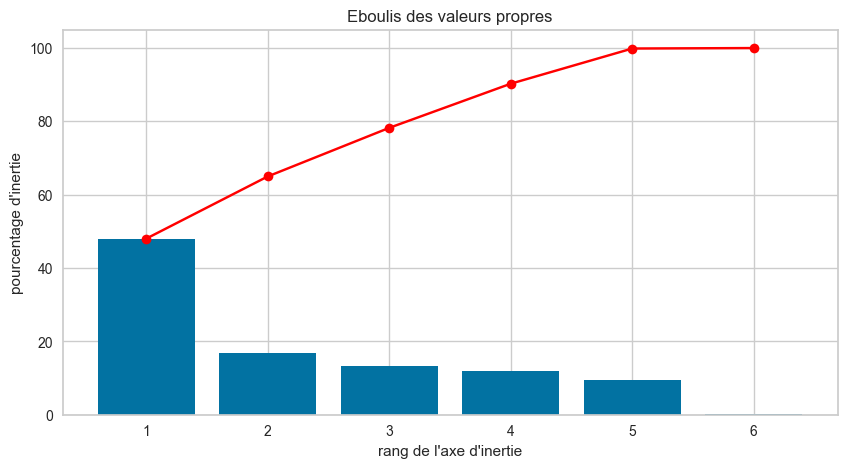

In [80]:
from sklearn.decomposition import PCA
# définir le nombre de composantes (le nombre de colonnes)
n_comp = 6

# calcul des composantes principales (= modèle appliqué sur les données)
pca = PCA(n_components = n_comp)

# appliquer l'algorithme entrainé
pca_components = pca.fit(X_scaled)

# nombre de composantes
pcs = pca.components_
print("Nombre de composantes calculées : ", pcs)
print("------------------------------------------------")
print("Proportion de variance expliquée : ", pca.explained_variance_ratio_)
print("------------------------------------------------")
print("Cumul de variance expliquée : ", pca.explained_variance_ratio_.cumsum())


# Eboulis des valeurs propres
plt.figure(figsize = (10,5))
# Appel à la fonction
display_scree_plot(pca)

* Le nombre de composant est égale à 4 me fera une variance de 90% c'est à dire là où les composantes supplémentaires commencent à apporter très peu d'information en plus ce qui nous a permis de choisir comme 4 le nombre de composants.

In [81]:
# appliquer l'acp pour avoir 6 composants du moment que 4 composantes nous permettent d'avoir 90% de l'information
pca = PCA(n_components = 4).fit(X_scaled)
print(pca)

# Projection sur les 6 composantes (faire des calculs sur les données transformées)
X_projected = pca.transform(X_scaled)
print(X_projected.shape)

PCA(n_components=4)
(1500, 4)


In [82]:
print("Nombre de composantes calculées : ", pca.components_)
print("------------------------------------------------")
print("Proportion de variance expliquée : ", pca.explained_variance_ratio_)
print("------------------------------------------------")
print("Cumul de variance expliquée : ", pca.explained_variance_ratio_.cumsum())

Nombre de composantes calculées :  [[-0.07484605  0.29707026  0.36169574  0.56074554  0.41226568 -0.53937462]
 [ 0.93986262  0.32597722  0.06746982 -0.05280782  0.01713659  0.05256041]
 [-0.30607247  0.89225762 -0.18166505 -0.10023996 -0.21649865  0.14238706]
 [-0.07907123  0.01460603  0.88817034 -0.11697031 -0.39188695  0.19346942]]
------------------------------------------------
Proportion de variance expliquée :  [0.48036511 0.16956964 0.13250164 0.12034588]
------------------------------------------------
Cumul de variance expliquée :  [0.48036511 0.64993475 0.78243639 0.90278227]


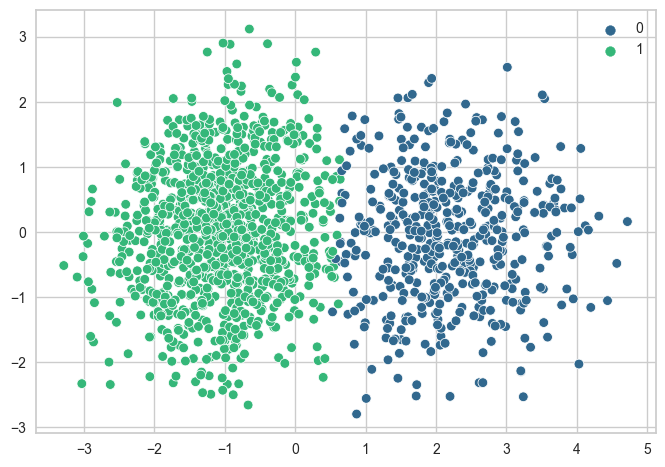

In [83]:
# Visualisation
sns.scatterplot(data = X_projected, x = X_projected[:, 0], y = X_projected[:, 1], palette = 'viridis', alpha = 1, hue = clusters)
plt.legend()
plt.show()

* Nous obtenons un nuage des points avec les deux (2) clusters.
* Maintenant nous allons créer une fonction de cercle des corrélations pour mieux visualiser les variables correlées avec chacune des 4 composantes .

### 5.1. Visualisation des composantes avec le cercle de corrélation

In [84]:
# Fonction pour le cercle de corrélation
def display_circles(pcs, n_comp, pca, axis_ranks, labels = None, label_rotation = 0, lims = None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize = (7,7))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles = 'xy', scale_units = 'xy', scale = 1, color = "grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes = ax, alpha = .1, color = 'black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha ='center', va ='center', rotation=label_rotation, color ="blue", alpha =0.5)
            
            # affichage du cercle
            an = np.linspace(0, 2 * np.pi, 100)  # Ajoutez un cercle d'unité pour l'échelle
            plt.plot(np.cos(an), np.sin(an))
            plt.axis('equal')

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

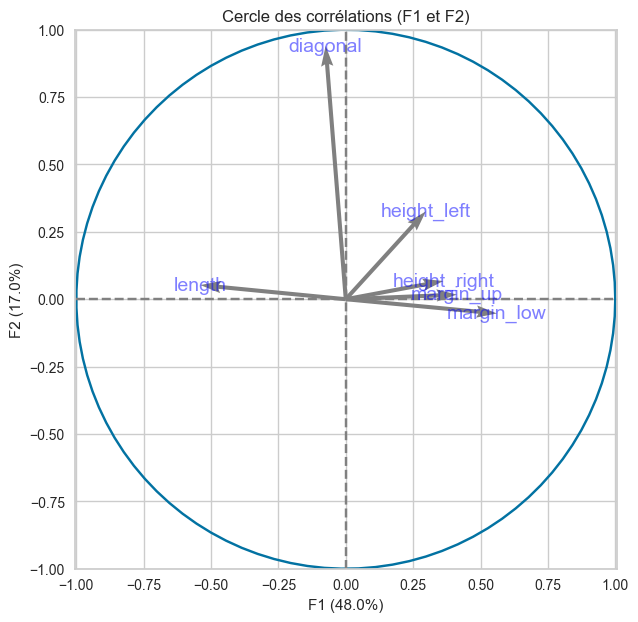

In [85]:
# Appel aux paramètres de la fonction
# Standardiser (center et réduire nos données)
scaler_pca = StandardScaler()
X_scaled_pca = scaler_pca.fit_transform(df)


index = df.index 
features = df.columns
n_comp = 4
pca = PCA(n_components = 4).fit(X_scaled_pca)
X_projected = pca.transform(X_scaled_pca)
pcs = pca.components_

# Appelle à la fonction sur les composantes 0 et 1
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

* La projection de la flèche représente la contribution de chacune des variables (représentant la variable v) sur F1 correspond au coefficient de corrélation entre v et F1 c'est à dire si deux variables évoluent quasiment de la même manière par exemple,
* Nous pouvons retrouver toutes les coordonnées de mes composantes principale dans "pca.components_"

In [86]:
# La contribution de chaque variable à chaque composante (pour F1)
F1 = pca.components_[0]
F1

array([-0.07484605,  0.29707026,  0.36169574,  0.56074554,  0.41226568,
       -0.53937462])

In [87]:
# La contribution de chaque variable à chaque composante (pour F2)
F2 = pca.components_[1]
F2

array([ 0.93986262,  0.32597722,  0.06746982, -0.05280782,  0.01713659,
        0.05256041])

##### Les variables corrélées positivement à F1
* height_left
* height_right
* margin_up
* margin_low
##### Les variables corrélées négativement à F1
* length
* diagonal
##### Les variables corrélées positivement à F2
* diagonal

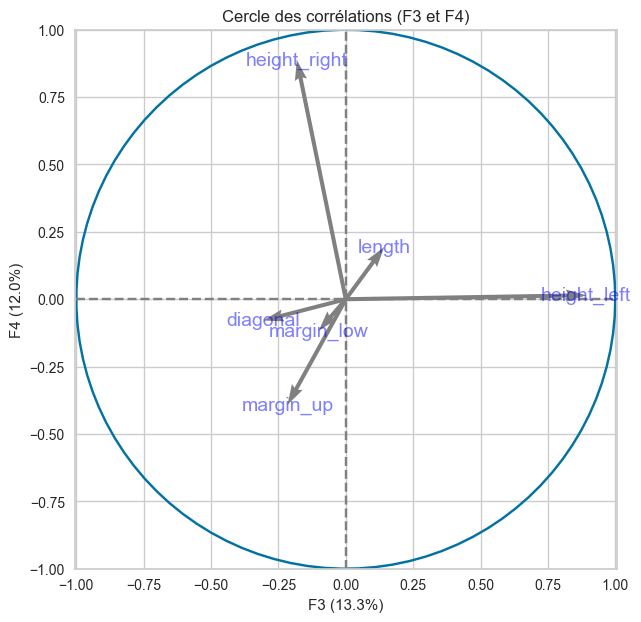

In [88]:
# Appelle à la fonction sur les composantes 2 et 3
display_circles(pcs, n_comp, pca, [(2,3)], labels = np.array(features))

In [89]:
# La contribution de chaque variable à chaque composante (pour F3) 
F3 = pca.components_[2]
F3

array([-0.30607247,  0.89225762, -0.18166505, -0.10023996, -0.21649865,
        0.14238706])

In [90]:
# La contribution de chaque variable à chaque composante (pour F4)
F4 = pca.components_[3]
F4

array([-0.07907123,  0.01460603,  0.88817034, -0.11697031, -0.39188695,
        0.19346942])

##### Les variables corrélées positivement à F3
* length
* height_left
##### Les variables corrélées négativement à F3
* diagonal
* margin_low
##### Les variables corrélées positivement à F4
* height_right
##### Les variables corrélées négativement à F4
* diagonal
* margin_low
* margin_up

### 5.2. Projection des billets sur le plan factoriel

In [91]:
# Définition de la fonction pour le graphique Projection des individus sur les plans factoriels
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig = plt.figure(figsize=(15, 8))

            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1],
                            X_projected[:, d2], alpha = alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(
                        X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i, (x, y) in enumerate(X_projected[:, [d1, d2]]):
                    plt.text(x, y, labels[i],
                             fontsize = '14', ha = 'center', va = 'center')

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-boundary, boundary])
            plt.ylim([-boundary, boundary])

            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title(
                "Projection des billets (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

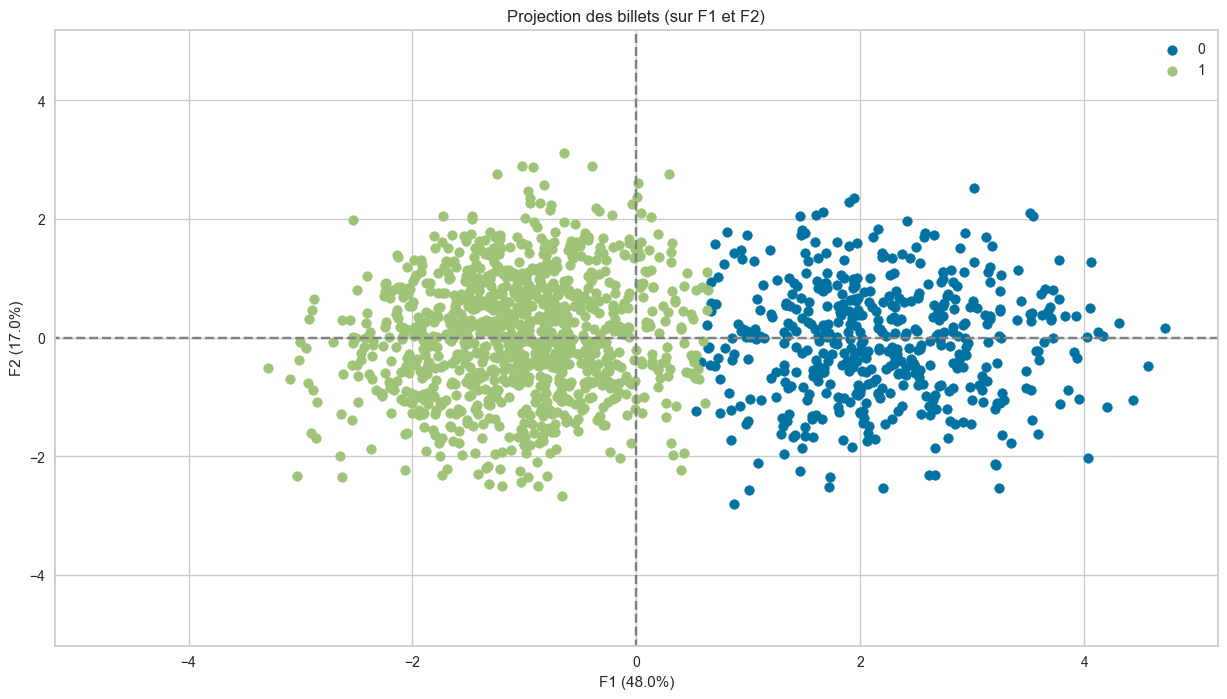

In [92]:
# Appel aux paramètres de la fonction
# Standardiser (center et réduire nos données)
scaler_pca = StandardScaler()
X_scaled_pca = scaler_pca.fit_transform(df)


index = df.index 
features = df.columns
n_comp = 4
pca = PCA(n_components = 4).fit(X_scaled_pca)
X_projected = pca.transform(X_scaled_pca)
pcs = pca.components_

# Appelle à la fonction sur les composantes 0 et 1
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = clusters)

* Nous interprétons cette graphique (ci dessus) en parallèle avec le cercle de corrélation , le cercle nous indique les variables les plus corrélées ou anticorrélées à F1 , F2, etc..
* Nous avions F1 qui est corrélée aux variables suivantes: height_left, height_right, margin_up, margin_low, donc il y'a de grande chance que ces billets aient aussi une grande grande valeur pour ces variables
* Pour les variables avec une faible corrélation , on pourra penser que ces billets ont une faible valeurs pour ces variables.

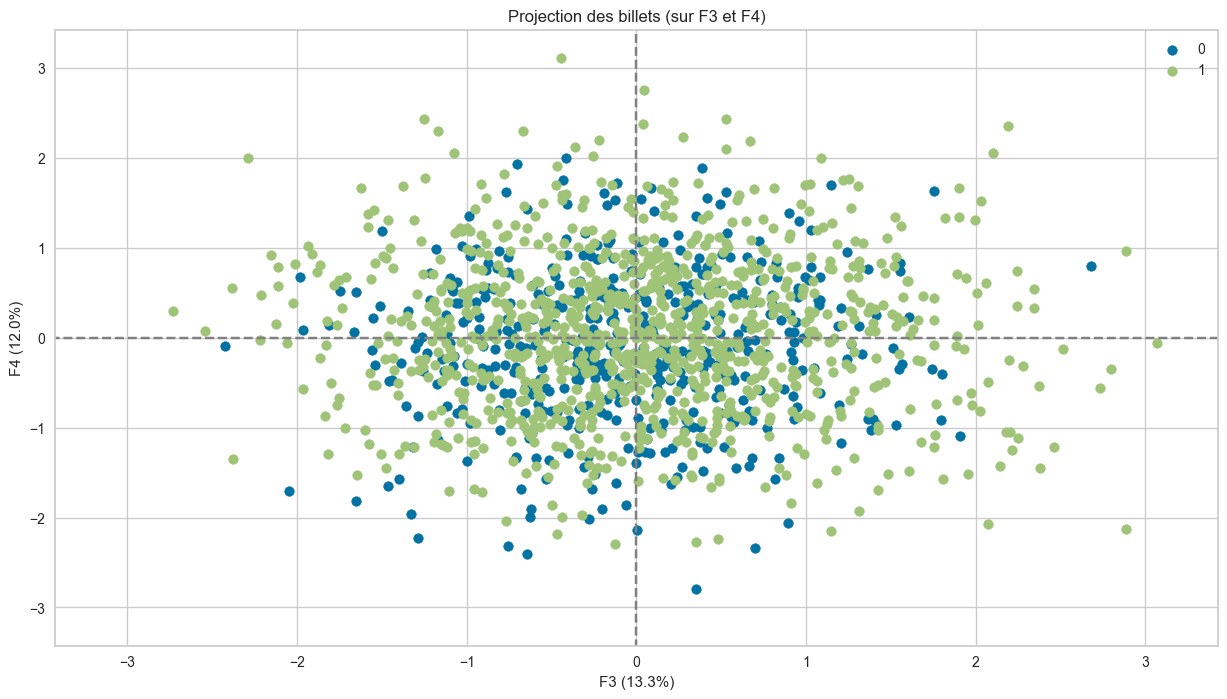

In [93]:
# # Appelle à la fonction sur les composantes 2 et 3
display_factorial_planes(X_projected, n_comp, pca, [(2,3)], illustrative_var = clusters)

* Le graphique ci dessus n'est pas homogènes avec tous les billets qui sont mélangés à l'exception de certains billets qui sont assez homogènes.
* Nous allons créer le dataframe avec les valeurs des composantes principales.

In [94]:
# Projection des individues avec leurs contributions
X_proj = pd.DataFrame(X_projected, index = df.index, columns = ["PC1", "PC2", "PC3", "PC4"])
X_proj[:10]

,PC1,PC2,PC3,PC4
is_genuine,,,,
True,-0.387091,-0.475572,0.435132,0.489927
True,-1.731902,-2.319918,-1.083479,-0.200346
True,-1.247948,2.764754,1.200754,-0.817366
True,-1.203282,-1.925642,0.600001,0.734148
True,0.547904,-0.530460,0.911803,-1.840576
True,-0.713536,0.387248,-0.952911,0.773652
True,0.014100,1.380769,0.039221,-0.435791
True,-0.990617,-0.476704,-0.495403,0.994121
True,-0.613677,1.473780,-0.746933,-0.947747


### 5.3. Tracé des centroides sur le plan factoriel

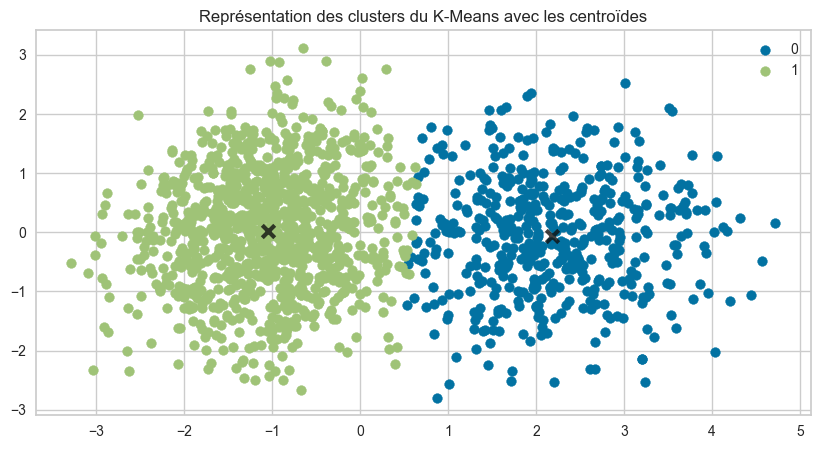

In [95]:
scaler_pca = StandardScaler()
X_scaled_pca = scaler_pca.fit_transform(df)

# Nbre de composants, entrainer
pca = PCA(n_components = 4).fit(X_scaled_pca)
pca_components = pca.transform(X_scaled_pca)
pcs = pca.components_

# Définir le modèle
model = KMeans(n_clusters=2)

# Prédiction
label = model.fit_predict(pca_components)

# Les centroides
centroids = model.cluster_centers_
u_labels = np.unique(label)

# Représentation graphique:
plt.figure(figsize=(10,5))
for i in u_labels:
    plt.scatter(pca_components[label == i , 0] , pca_components[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, alpha = 0.8, marker='x', linewidths=3, color = 'k')
plt.legend()
plt.title('Représentation des clusters du K-Means avec les centroïdes')
plt.show()

### 5.4. Tracé des coordonnées parallèles pour les centroïdes avec K-means

In [96]:
# Faire une copy obetenu 
df_kmeans_centroide = df_kmeans_clusters.copy()
# Définir un index
df_kmeans_centroide = df_kmeans_centroide.set_index("Cluster_Billets")
# Afficher
df_kmeans_centroide

,diagonal,height_left,height_right,margin_low,margin_up,length
Cluster_Billets,,,,,,
0,-0.181261,0.558728,0.711546,1.276478,0.885465,-1.244885
1,0.086613,-0.266979,-0.340000,-0.609943,-0.423104,0.594847


In [97]:
from pandas.plotting import parallel_coordinates
palette = sns.color_palette("bright", 10)

# fonction pour tracer les coordonnées
def display_parallel_coordinates_centroids(df, num_clusters):
    '''Afficher un tracé de coordonnées parallèles pour les centroïdes en df'''

    # Create the plot
    fig = plt.figure(figsize=(10, 5))
    title = fig.suptitle("Coordonnées parallèles pour les centroïdes", fontsize = 15)
    fig.subplots_adjust(top = 0.9, wspace = 0)
    plt.xticks(fontsize = 13, rotation = 30)
    # Draw the chart
    parallel_coordinates(df, 'Cluster_Billets', color = palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)  

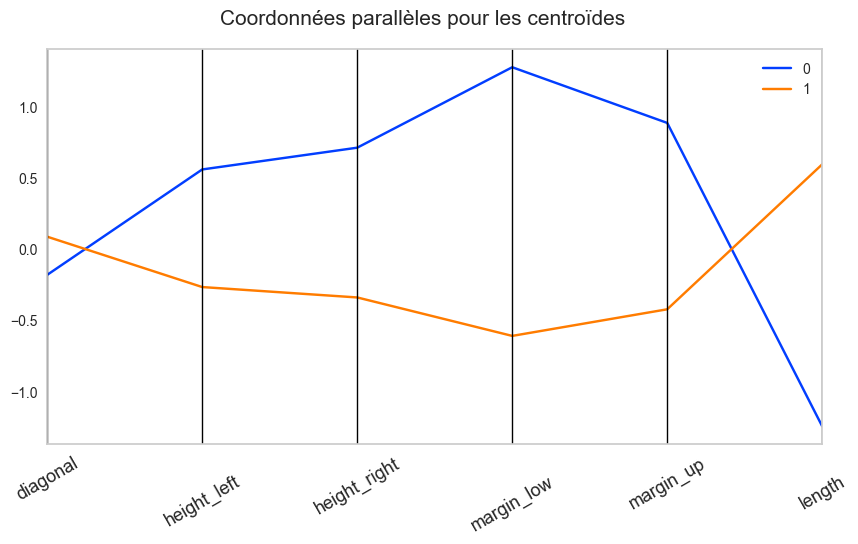

In [98]:
# Visualisation
display_parallel_coordinates_centroids(df_kmeans_centroide.reset_index(), 2)

### Interprétation des coordonnées

<ul>
    <li><strong>Cluster 0 :</strong> représente les billets où toutes les dimensions sont moyennement élevés à l'exception de la longueur du billet.</li>
    <li><strong>Cluster 1 :</strong> représente les billets avec un diagonal et longueur de billets moyennement élevés par rapport aux autres dimensions qui sont moyennement faibles.</li>
    </ul>

### 5.5. Matrice des corrélations avec K-means

In [99]:
df_kmeans_clusters = label_billets.groupby("Cluster_Billets").mean()
df_kmeans_clusters

,diagonal,height_left,height_right,margin_low,margin_up,length
Cluster_Billets,,,,,,
0,-0.181261,0.558728,0.711546,1.276478,0.885465,-1.244885
1,0.086613,-0.266979,-0.340000,-0.609943,-0.423104,0.594847


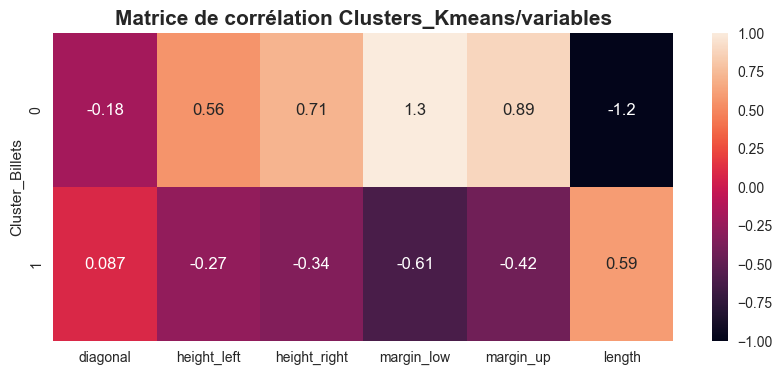

In [100]:
# Visualisation
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(df_kmeans_clusters, annot = True, vmin = -1, vmax = 1)
plt.title("Matrice de corrélation Clusters_Kmeans/variables", fontsize = 15, fontweight = "bold")
plt.show()

* Après avoir détecter les différents clusters et faire leurs interprétations, nous allons maintenant essayer d'évaluer la performance de notre modèle (K-means) avec diffréentes métriques;
* Pour celà nous devons choisir les bons métriques pour évaluer la performnance du modèle.

## 6. Choix de la métrique d'évaluation de la performance du modèle Kmeans

### 6.1. Matrice de confusion

* La matrice de confusion est un concept fondamental pour un modèle de classification, c'est une matrice carrée qui rapporte le nombre de vrais positifs (TP), vrais négatifs (TN), faux positifs (FP), faux négatifs (FN).
* A partir de la matrice de confusion, nous pouvons calculer certaines métriques pour évaluer la performance du modèle.

In [101]:
# remplacer les données de la colonne "is genuine" par des nombres 
label_billets = label_billets.reset_index()
label_billets['is_genuine'] = label_billets['is_genuine'].replace(["True", "False"], [1, 0])
label_billets.head(3)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Cluster_Billets
0,1,-0.495359,0.039038,-0.002966,0.224316,-1.139386,0.168243,1
1,1,-1.669249,-2.269297,-0.829116,-0.605839,-0.702996,0.469559,1
2,1,2.456135,1.532667,-1.337515,-0.639957,-0.921191,0.550682,1


In [102]:
# Tableau de contigence entre les deux variables 
cont_table = pd.crosstab(label_billets["is_genuine"], label_billets["Cluster_Billets"])
cont_table

Cluster_Billets,0,1
is_genuine,,
0,471,29
1,14,986


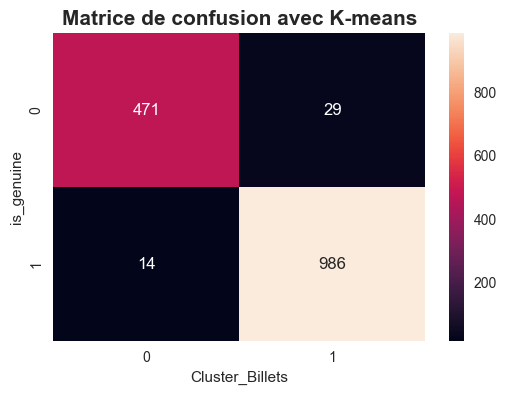

In [145]:
# Visualisation du tableau de contingence
plt.figure(figsize = (6, 4))
sns.heatmap(cont_table, annot = cont_table, fmt = 'd')
plt.xticklabels = ["Faux","Vrais"]
plt.title("Matrice de confusion avec K-means",fontsize = 15, fontweight = "bold")
plt.plot()
plt.show()

### Interprétation de la matrice de confusion

* Sur 500 faux billets, le modèle a correctement détecter 471 faux billets (TN) qu'il l'a prédit comme faux billets mais aussi le modèle a détecter 29 faux billets (FN) comme des vrais billets alors que le modèle les a prédit comme des vrais billets.
* Sur 1000 vrais billets, nous avons 986 vrais billets (TP) qui ont été détectés comme vrais billets puis prédit comme des vrais billets, mais 14 billets sont détectées comme des vrais billets (FP) alors que le modèle les a prédit comme des faux billets.
* Maintenant nous pouvons passer au modèle de régression logistique.

*Nous pouvons dire que la matrice de confusion nous permet de voir si notre modèle a bien prédit nos données, et dans ce cas on remarque qu'il a eu des erreurs,Nous pouvons aussi utiliser la ROC pour déterminer la qualité prédictive de notre modèle*.

*Pour celà nous allons essayer d'autres méthodes avec de nouvelles métriques d'évaluation du modèle*.

# 7. Régression logistique

* La régression logistique nous permet de traiter un cas de classification supervisée sur un cas où on est entrain de modéliser une variable qualitative par des variables explicatives.
* Elle va nous permettre de modéliser dans le cadre général une variable Y qui peut prendre deux valeurs 0 (non occurrence d'un événement) ou 1 (occurrence d'un évenement).

## 7.1. Préparation des données

In [104]:
# Faire une copie
df = data_billets.copy()
# Afficher les données
df.head(3)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.04,103.92,-24.456867,2.89,112.83
1,True,171.46,103.36,103.66,-24.733191,2.99,113.09
2,True,172.69,104.48,103.50,-24.744548,2.94,113.16


In [105]:
# Remplacer les données de la colonne "
df["is_genuine"] = df["is_genuine"].replace(["True", "False"], [1,0])
# Affichage après remplacement des données
df.head(3)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.04,103.92,-24.456867,2.89,112.83
1,1,171.46,103.36,103.66,-24.733191,2.99,113.09
2,1,172.69,104.48,103.50,-24.744548,2.94,113.16


In [106]:
# features
X = df.drop(columns = ["is_genuine"], axis = 1)

# variable cible            
y = df["is_genuine"]   

print(X.shape)
print(y.shape)

(1500, 6)
(1500,)


In [107]:
# Données d'entrainement et de test
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1125, 6)
X_test shape: (375, 6)
y_train shape: (1125,)
y_test shape: (375,)


* X_train et y_train pour entrainer notre modèle;
* X_test et y_test_pour évaluer la performance du modèle.

In [108]:
# répartition
y_train.value_counts(normalize=True)

1    0.675556
0    0.324444
Name: is_genuine, dtype: float64

* Nous observons une déséquilibre des deux classes avec les vrais billets qui représentent 67.55% et les faux billets qui représente 32.44%.

In [109]:
# Standardisation
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

## 7.2. Création du modèle, entrainement et prédiction

In [110]:
# Instanciation du modèle
lr_model = LogisticRegression(random_state = 42, solver = 'liblinear', multi_class = 'auto')

# Appliquer le modèle (entrainement)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [111]:
# Prédiction
y_pred = lr_model.predict(X_test)

# Afficher les valeurs après prédiction (valeurs obtenues à partir de notre modèle)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [112]:
# Afficher les vraies valeurs
y_test

1116    0
1368    0
422     1
413     1
451     1
       ..
155     1
1151    0
1141    0
974     1
1057    0
Name: is_genuine, Length: 375, dtype: int64

### 7.3. Métriques d'évaluation du modèle

* Il existe plusieurs métriques permettant d'évaluer cette performance.
* Le choix de la métrique doit être en fonction du problème business qu'on veut résoudre.
* Commençons d'abord par calculer la précision globale du modèle.

In [113]:
# Précision globale du modèle
print("Le score sur les données d'entraînement est :", lr_model.score(X_train, y_train))
print("Le score sur les données d'évaluation est :", lr_model.score(X_test, y_test))

Le score sur les données d'entraînement est : 0.9733333333333334
Le score sur les données d'évaluation est : 0.976


*Ces valeurs nous indiquent que pratiquement 97% des billets ont été correctement prédits au niveau des données d'entraînement et qu'environ 97% des billets ont été correctement prédits au niveau des données de test. Il n'y a pas d'écart entre score d'entraînement et score de test indique qu'il y a pas un problème de surapprentissage (overfiting).*

*Une autre fonction utilisée pour évaluer les modèles de classification est la fonction classification_report(). Cette fonction permet de générer d'un seul coup plusieurs métriques.*

#### 7.3.a) Evaluation du modèle

#### Métrique: Classification report

* On l'appel Accuracy en anglais qui est le pourcentage d'instances correctement classifiées qu'il s'agit de la classe positive ou de la classe négative, c'est à dire la somme du nombre de vrais positifs divisée par le nombre total des observations.

In [114]:
# Rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       135
           1       0.97      1.00      0.98       240

    accuracy                           0.98       375
   macro avg       0.98      0.97      0.97       375
weighted avg       0.98      0.98      0.98       375



*cliquer sur le lien [suivant](https://kobia.fr/classification-metrics-sensitivity-specificity-roc/) pour comprendre la matrice de confusion avec les différentes métriques.*

* Le recall des faux billets est de  94% , cela signifie qu'il y'a un taux élevé de faux billets. Ceci constitue un grand risque de perte d'argent à l'entreprise.
* Tandisque , le modèle prédit bien que 100% des billets sont des vrais billets et celà peut entrainer une faillite à l'entreprise.
* Pour celà nous allons tester d'autres métriques.

In [115]:
#print(confusion_matrix(y_test, y_pred))

In [116]:
# Visualisation des données de la matrice 
cont_table_rl = pd.crosstab(y_test, y_pred)
cont_table_rl

col_0,0,1
is_genuine,,
0,127,8
1,1,239


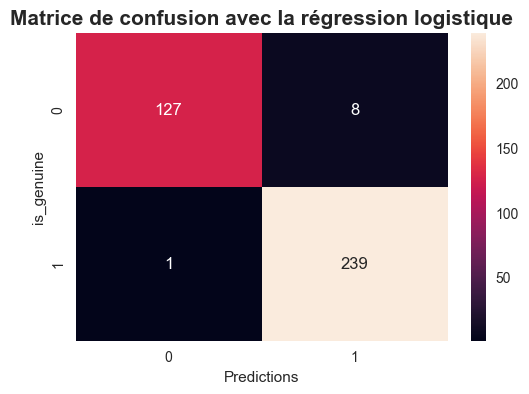

In [146]:
# Visualisation du tableau de contigence
plt.figure(figsize = (6, 4))
sns.heatmap(cont_table_rl, annot = cont_table_rl, fmt = 'd')
plt.xlabel("Predictions")
plt.title("Matrice de confusion avec la régression logistique", fontsize = 15, fontweight = "bold")
plt.plot()
plt.show()

* Sur 135 faux billets, le modèle a correctement détecter 127 faux billets (TN) qu'il l'a prédit comme faux billets mais aussi le modèle a détecter 8 faux billets (FN) comme des vrais billets alors que le modèle les a prédit comme des vrais billets.
* Sur 240 vrais billets, nous avons 239 vrais billets (TP) qui ont été détectés comme vrais billets peuis prédit comme comme des vrais billets, mais 1 billets sont détectées comme des vrais billets (FP) alors que le modèle les a prédit comme des faux billets.

#### 7.3.b) La sensibilité et la spécificité

*La sensibilité (sensitivity en anglais) et la spécificité (specificity) sont deux métriques pour évaluer la performance des modèles de classification à 2 classes ou plus. Ces métriques sont basées sur la matrice de confusion.*
*La sensitivity et la specificity sont deux métriques complémentaires qui résument la performance du modèle en prenant en compte l’ensemble des composantes de la matrice de confusion.*
#### La sensibilité:
*La sensibilité est le taux d’individus positifs correctement prédits par le modèle :*
*Elle mesure la capacité du modèle à détecter l’ensemble des individus positifs. On la trouve aussi sous le nom de rappel (recall), taux de vrais positifs (True Positive notée TP)*.
#### La spécificité:
*La specificité est le taux d’individus négatifs correctement prédits par le modèle :*
*Elle mesure la capacité du modèle à détecter l’ensemble des individus négatifs. On la trouve aussi sous le nom de sélectivité (selectivity) ou taux de vrais négatifs (True Negative notée TN).*

* La sensibilité et la specificité sont deux métriques essentielles en classification, du fait de leur complémentarité et car elles forment le socle de la courbe ROC.

### Courbe ROC

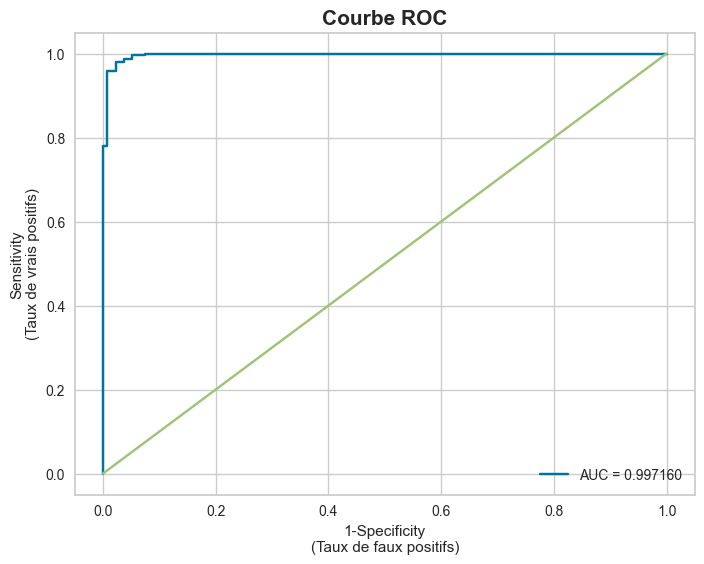

In [147]:
# Visualisation de la courbe ROC
probabilities = lr_model.predict_proba(X_test)[:,1]
# un seuil de classification à partir duquel on considère que la probabilité est significative
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
auc = roc_auc_score(y_test, probabilities)               
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr)                                        
plt.plot([0, 1], [0, 1])                                 
plt.title('Courbe ROC', fontsize = 15, fontweight = "bold")
plt.xlabel("1-Specificity" "\n" "(Taux de faux positifs)")
plt.ylabel("Sensitivity" "\n" "(Taux de vrais positifs)")
plt.legend(["AUC = %.6f"%auc])
plt.show()

* On remarque que la performance n'évolue presque plus à partir du moment on a atteint les 10% du taux de faux posisifs;
* Nous obtenons un AUC (l'aire qui se trouve en dessous de la courbe) égale à 99.72%;
* ça nous montre que la modèle va continuer à stagner, il est très peu probable qu' on obtient des meilleurs performances en ayant plus de données.

*REMARQUE*
* Une spécificité élevée est meilleure , mais il faudra un compromis entre la sensibilité du modèle et le spécificité car l'amélioration de la sensibilité diminue la spécificité et l'amélioration de la spécificité diminue la sensibilité.
* Il faut faire attentation à la précision globale. Une forte précision globale ne signifie pas forcément que le modèle est performant. Le choix de la métrique pour quantifier la performance du modèle doit se faire en fonction du contexte de l'étude c'est à dire la problématique business qu'on veut résoudre parceque là nous avons un déséquilibre des classes = billets).

### Allez plus loin: Optimisation du modèle (amélioration)

* C'est pour améliorer notre modèle avec un meilleur score
* Nous avons entrainé notre sans les hyperparamètres puis prédire;
* Dans cette partie de l'optimisation du modèle, nous essayer la performance du modèle en choisissant des hyperparamètres pour mieux améliorer le modèle;
* Ce qui nous permettra d'obtenir de meilleurs résultats puis le comparant avec le modèle construit sans paramètre;
* afin de choisir le meilleur modèle pour pouvoir faire de nouvelles prédictions sur de nouvelles données.

In [119]:
%%time

lr_clf = LogisticRegression(max_iter = 400, solver = 'lbfgs', random_state = 42)   

# Liste des hyperparamètres
lr_parameters = {'C':np.logspace(-10, 1, 15),
                 'class_weight':[None,'balanced'],
                 'penalty':['l1','l2']
                }
# technique de cross validation (avec StratifiedKFold efficace avec une déséquilibres des classes)
cv = StratifiedKFold(n_splits = 5, random_state = 42, shuffle=True)

# Passer le modèle dans le grid avec le dictionnaire des hyperparamètres (recherche aléatoire)
lr_grid = RandomizedSearchCV(lr_clf, lr_parameters, cv=cv, refit='True', n_jobs=-1, verbose=1, scoring='roc_auc')
# entrainer les données
lr_grid.fit(X_train, y_train)

# Sauvegerder le modèle pour pour tester sur les données test
LR_model = lr_grid.best_estimator_
print(lr_grid.best_score_)
print(LR_model.score(X_test, y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.9948449891852921
0.968
CPU times: total: 344 ms
Wall time: 6.49 s


In [120]:
# Afficher les différentes métriques (aprés la recherche aléatoire)
# Prédire les étiquettes de classe pour les échantillons dans X.
y_prob = LR_model.predict_proba(X_test)
# Estimations de probabilité pour chaque cible
y_pred = LR_model.predict(X_test)

print('Confusion Matrix')
print('='*60)
print(confusion_matrix(y_test,y_pred),"\n")
print('Classification Report')
print('='*60)
print(classification_report(y_test,y_pred),"\n")
print('='*60)
print("precision")
print(precision_score(y_test,y_pred), "\n")
print('='*60)
print("recall")
print(recall_score(y_test,y_pred), "\n")
print('='*60)
print('AUC-Score')
print(lr_grid.best_score_, "\n")
print('='*60)
print('AUC-ROC Test')
print(roc_auc_score(y_test, y_prob[:,1]), "\n")
print('='*60)
print("F1 score")
print(f1_score(y_test,y_pred), "\n")
print('='*60)
print('Hyperparamètres')
print(lr_grid.best_params_, "\n")
print('='*60)
print('Meilleurs estimateurs')
print(lr_grid.best_estimator_, "\n")
# Précision globale du modèle
print("Le score sur les données d'entraînement est :", LR_model.score(X_train, y_train))
print("Le score sur les données d'évaluation est :", LR_model.score(X_test, y_test))

Confusion Matrix
[[128   7]
 [  5 235]] 

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       135
           1       0.97      0.98      0.98       240

    accuracy                           0.97       375
   macro avg       0.97      0.96      0.97       375
weighted avg       0.97      0.97      0.97       375
 

precision
0.9710743801652892 

recall
0.9791666666666666 

AUC-Score
0.9948449891852921 

AUC-ROC Test
0.9980555555555556 

F1 score
0.9751037344398341 

Hyperparamètres
{'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.00019306977288832496} 

Meilleurs estimateurs
LogisticRegression(C=0.00019306977288832496, class_weight='balanced',
                   max_iter=400, random_state=42) 

Le score sur les données d'entraînement est : 0.9715555555555555
Le score sur les données d'évaluation est : 0.968


* Le recall des faux billets est de  95% (contrairement au premier résultat où nous avons 93%), cela signifie qu'il y a plus de faux billets. Ce qui pourrait conduire une énorme perte à l'entreprise.
* Tandisque , le modèle prédit bien que 98% des billets sont vrais (différent des 100% de vrais billets obtenus avec le premier résultat de notre modèle).

In [121]:
# Visualisation des données de la matrice 
cont_table_r2 = pd.crosstab(y_test, y_pred)
cont_table_r2

col_0,0,1
is_genuine,,
0,128,7
1,5,235


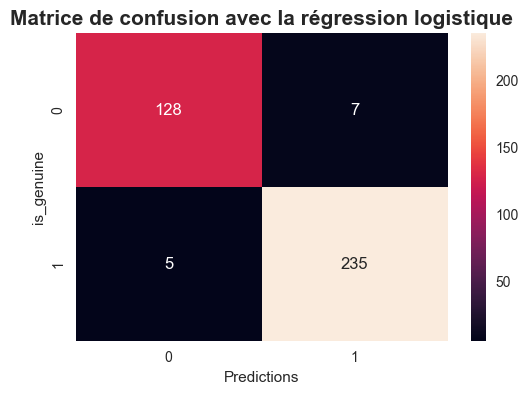

In [148]:
# Visualisation du tableau de contigence
plt.figure(figsize = (6, 4))
sns.heatmap(cont_table_r2, annot = cont_table_r2, fmt = 'd')
plt.title("Matrice de confusion avec la régression logistique", fontsize = 15, fontweight = "bold")
plt.xlabel("Predictions")
plt.plot()
plt.show()

* Sur 135 faux billets, le modèle a correctement détecter 128 faux billets (TN) qu'il l'a prédit comme faux billets mais aussi le modèle a détecter 7 faux billets (FN) comme des vrais billets alors que le modèle les a prédit comme des vrais billets.
* Sur 240 vrais billets, nous avons 235 vrais billets (TP) qui ont été détectés comme vrais billets peuis prédit comme comme des vrais billets, mais 5 billets sont détectées comme des vrais billets (FP) alors que le modèle les a prédit comme des faux billets.

*Nous remarquons que avec l'ajout des hyperparamètres le model a augmenté le taux de faux positifs (FP) en diminuant le taux de vrai positif (TP)*.

### Courbe ROC

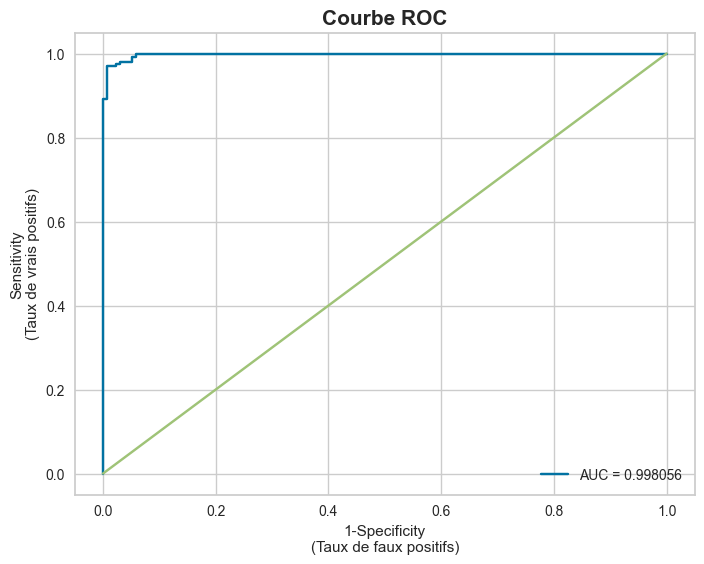

In [149]:
# Visualisation de la courbe ROC
# en prenant toutes les lignes ( :) mais en gardant la deuxième colonne ( 1)
probabilities = LR_model.predict_proba(X_test)[:,1]
# un seuil de classification à partir duquel on considère que la probabilité est significative
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
auc = roc_auc_score(y_test, probabilities)               
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr)                                        
plt.plot([0, 1], [0, 1])                                 
plt.title('Courbe ROC', fontsize = 15, fontweight = "bold")
plt.xlabel("1-Specificity" "\n" "(Taux de faux positifs)")
plt.ylabel("Sensitivity" "\n" "(Taux de vrais positifs)")
plt.legend(["AUC = %.6f"%auc])
plt.show()

* Nous obtenons un  AUC égale à 99.80%, celà montre nous avons une très bonne performance de notre modèle qui est capable de détecter les vrais billets.

### Sauvegarde et déploiement du modèle

* Le choix s'est porté sur le modèle sans l'ajout des hyperparamètres (modèle avec les paramètres par défaut) car nous avons détecter le plus de vrai billets.

In [124]:
# Entraînement du modèle final
model_final = LogisticRegression(random_state = 42, solver = 'liblinear', multi_class = 'auto')
model_final.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [125]:
# Sauvegarde du modèle 
import pickle
pickle.dump(model_final, open("classification_model.pkl", "wb"))

In [126]:
# Chargement du modèle pour faire de nouvelles prédictions
pickle_model_lr = pickle.load(open("classification_model.pkl", "rb"))

In [127]:
# Calculer le score de précision et prédire les valeurs cibles
score_train = pickle_model_lr.score(X_train, y_train)
score_test = pickle_model_lr.score(X_test, y_test)
print("Train score: {0:.2f} %".format(100 * score_train))
print("Test score: {0:.2f} %".format(100 * score_test))
y_predict = pickle_model_lr.predict_proba(X_test)[:,1]

Train score: 97.33 %
Test score: 97.60 %


# 8. Essai de l'algorithme avec de nouvelles données

In [128]:
# Importer les nouvelles données
data_production = pd.read_csv(r"C:\Users\diarr\Downloads\P10\billets_production.csv", sep = ',')

# Faire une copy()
data_production_1 = data_production.copy()
data_production_2 = data_production.copy()

## 8.1. Premier essai de l'algorithme sur de nouvelles données

In [129]:
# lecture des données
print(data_production_1.shape)
data_production_1.head(5)

(5, 7)


,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [130]:
# Les types de données
data_production_1.dtypes

diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
id               object
dtype: object

In [131]:
# les valeurs manquantes
data_production_1.isnull().sum()

diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
id              0
dtype: int64

In [132]:
# les valeurs uniques de la colonne
data_production_1["id"].unique()

array(['A_1', 'A_2', 'A_3', 'A_4', 'A_5'], dtype=object)

In [133]:
# Suppression de la colonne
data_production_1 = data_production_1.drop(columns = "id")

In [134]:
# Standardisation
scaler = StandardScaler()
scaler.fit(data_production_1)
df_prod = pd.DataFrame(scaler.transform(data_production_1), columns = data_production_1.columns)
# nouveau dataframe avec les données standardisées
df_prod.head(5)

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.664228,-0.502224,-1.228900,0.438224,0.485681,-1.124014
1,-0.287604,-0.050787,0.449459,1.493702,0.564017,-0.289103
2,0.157497,1.106022,0.904607,0.144293,1.190702,-0.937094
3,1.835186,1.021377,1.046841,-0.590533,-1.629382,1.094107
4,-1.040852,-1.574388,-1.172007,-1.485686,-0.611018,1.256104


In [135]:
# Prédiction fichier test
y_pred_prod = pickle_model_lr.predict(df_prod)
y_pred_prod

array([0, 0, 0, 1, 1], dtype=int64)

In [136]:
# Probabilités de vrais billets
y_prob_prod = pickle_model_lr.predict_proba(df_prod)[:, 1]
y_prob_prod 

array([0.20944889, 0.02698668, 0.03065991, 0.99912906, 0.99997497])

In [137]:
# Création de la colonne de prédiction
data_production_1["Prediction"] = y_pred_prod

# colonne de la probabilité du billet
data_production_1["Probability billets (en %)"] = y_prob_prod.round(2)

# Lecture des données
data_production_1.head(5)

,diagonal,height_left,height_right,margin_low,margin_up,length,Prediction,Probability billets (en %)
0,171.76,104.01,103.54,5.21,3.30,111.42,0,0.21
1,171.87,104.17,104.13,6.00,3.31,112.09,0,0.03
2,172.00,104.58,104.29,4.99,3.39,111.57,0,0.03
3,172.49,104.55,104.34,4.44,3.03,113.20,1,1.00
4,171.65,103.63,103.56,3.77,3.16,113.33,1,1.00


### Autre méthode d'essai de l'algorithme sur de nouvelles données

In [153]:
# Prédire les billets de production avec la régression logistique
df_test = pd.read_csv('billets_production.csv', sep =",")
df_test = df_test.drop(columns = "id")

# Standardisation
scaler = StandardScaler()
scaler.fit(df_test)
df_prod = pd.DataFrame(scaler.transform(df_test), columns = df_test.columns)
# Prédiction fichier test
df_test["Prediction"] = pickle_model_lr.predict(df_prod)
df_test[["Probabilité faux","Probabilité vrai"]] = pickle_model_lr.predict_proba(df_prod)
df_test["Nature_billet (Vrai ou faux)"] = pickle_model_lr.predict(df_prod[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
df_test["Nature_billet (Vrai ou faux)"].replace([0,1],["Faux billet", "Vrai billet"], inplace=True)

df_test

,diagonal,height_left,height_right,margin_low,margin_up,length,Prediction,Probabilité faux,Probabilité vrai,Nature_billet (Vrai ou faux)
0,171.76,104.01,103.54,5.21,3.30,111.42,0,0.790551,0.209449,Faux billet
1,171.87,104.17,104.13,6.00,3.31,112.09,0,0.973013,0.026987,Faux billet
2,172.00,104.58,104.29,4.99,3.39,111.57,0,0.969340,0.030660,Faux billet
3,172.49,104.55,104.34,4.44,3.03,113.20,1,0.000871,0.999129,Vrai billet
4,171.65,103.63,103.56,3.77,3.16,113.33,1,0.000025,0.999975,Vrai billet


* Le modèle prédit que nous avons les 3 premiers qui sont des faux billets et les 2 derniers qui sont des vrais billets.

## 8.2. Deuxième essai: Création d'une fonction pour faire la production

In [150]:
# Création de la fonction pour automatiser la production du modèle
def detect_billet(data):
    data_test = data[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up','length']]

    # Standardisation
    scaler = StandardScaler()
    scaler.fit(data_test)
    data_prod = pd.DataFrame(scaler.transform(data_test), columns = data_test.columns)
    # Prédictions
    data_test["Prediction"] = pickle_model_lr.predict(data_prod)
    data_test[["Probabilité faux","Probabilité vrai"]] = pickle_model_lr.predict_proba(data_prod)
    data_test["Authentification"] = pickle_model_lr.predict(data_prod[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
    data_test["Authentification"].replace([0,1],["Faux billet", "Vrai billet"], inplace=True)
    
    # Afficher les résultats
    print("\n")
    print("Nombre total de billets : ", len(data_test))
    print("Nombre de vrais billets : ", len(data_test[data_test["Prediction"] == 1]))
    print("Nombre de faux billets : ", len(data_test[data_test["Prediction"] == 0]), "\n")
    
    # Visualisation
    labels=["Faux billet", "Vrai billet"]
    sns.countplot(x = "Authentification", data = data_test, palette = "Set2")
    plt.ylabel("Nombre de billets")
    plt.title("Détection du nombre des faux/vrais billets", fontsize = 15, fontweight = "bold")
    plt.show()
    print("\n")



Nombre total de billets :  5
Nombre de vrais billets :  2
Nombre de faux billets :  3 



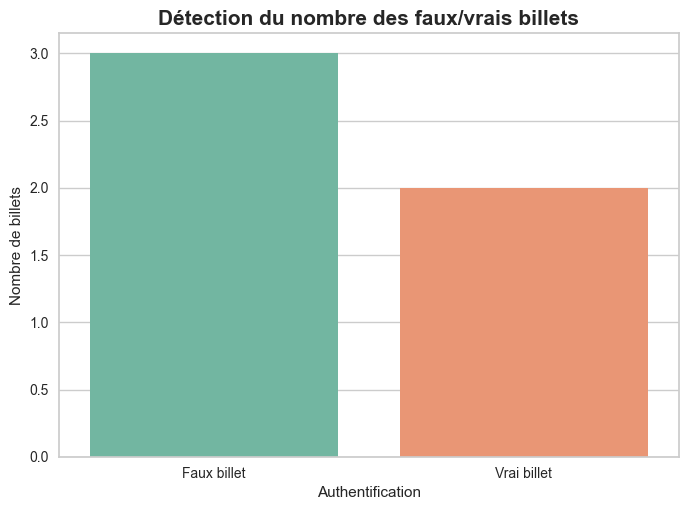

In [151]:
# Suppression de la colonne identifiant
#data_production_2 = data_production_2.drop(columns = "id")
data_production_2 = data_production_2[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

# Appelle à la fonction
detect_billet(data_production_2)

Sources 
##### Traitement des valeurs aberrantes
* https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/
##### Python – méthode seaborn.pairplot()
* https://www.geeksforgeeks.org/python-seaborn-pairplot-method/
##### sklearn.linear_model.LinearRegression
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* https://datatab.fr/tutorial/linear-regression
* https://www.youtube.com/watch?v=WLmOFlSxYTY
* https://ledatascientist.com/creer-un-modele-de-regression-lineaire-avec-python/
* https://ia-z.github.io/ia-z/docs/Cours%20fondamentaux%20ML/module_1_introduction/03%20-%20Regression%20lineaire.html
* https://lexique.netmath.ca/coefficient-de-determination/
* https://pingouin-stats.org/build/html/generated/pingouin.linear_regression.html
##### Traitement des valeurs manquantes
* https://larevueia.fr/4-methodes-pour-gerer-les-donnees-manquantes-en-machine-learning-avec-pandas/
##### Statsmodels
* https://www.statsmodels.org/stable/index.html
* https://ichi.pro/fr/un-peu-plus-pres-de-la-distance-de-cook-255965324259920
* https://www.scikit-yb.org/fr/latest/api/regressor/influence.html
* https://stacklima.com/detection-de-la-multicolinearite-avec-vif-python/
##### sklearn.linear_model.LogisticRegression
* https://www.stat4decision.com/fr/faire-une-regression-logistique-avec-python/
* https://www.youtube.com/watch?v=eQjtZ0qpOVg
* https://kobia.fr/classification-metrics-sensitivity-specificity-roc/
* https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html
* https://medium.com/analytics-vidhya/hyper-parameter-tuning-gridsearchcv-vs-randomizedsearchcv-499862e3ca5
* https://www.youtube.com/watch?v=EIaWIkJ-MVc
* https://www.youtube.com/watch?v=VRE7wbvEtIg&t=1s
* https://www.codespeedy.com/predict_proba-for-classification-problem-in-python/
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba